In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, string, nltk
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
punct = string.punctuation + ")" + "(" + ":" + ";"

In [2]:
train = pd.read_excel('Data_Train.xlsx')
test = pd.read_excel('Data_Test.xlsx')
sample = pd.read_excel('Sample_Submission.xlsx')

In [3]:
train.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [4]:
test.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4 out of 5 stars,960 customer reviews,A collection of entire body of work of the She...,Short Stories (Books),"Crime, Thriller & Mystery"
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0 out of 5 stars,1 customer review,Enhance your software deployment workflow usin...,Operating Systems Textbooks,"Computing, Internet & Digital Media"
2,Big Girl,Danielle Steel,"Paperback,– 17 Mar 2011",5.0 out of 5 stars,4 customer reviews,"'Watch out, world. Here I come!'\nFor Victoria...",Romance (Books),Romance
3,Think Python: How to Think Like a Computer Sci...,Allen B. Downey,"Paperback,– 2016",4.1 out of 5 stars,11 customer reviews,"If you want to learn how to program, working w...",Programming & Software Development (Books),"Computing, Internet & Digital Media"
4,Oxford Word Skills: Advanced - Idioms & Phrasa...,Redman Gairns,"Paperback,– 26 Dec 2011",4.4 out of 5 stars,9 customer reviews,"Learn and practise the verbs, prepositions and...",Linguistics (Books),"Language, Linguistics & Writing"


In [5]:
train.describe(include=['O','float'])

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
count,6237,6237,6237,6237,6237,6237,6237,6237,6237.000000
unique,5568,3679,3370,36,342,5549,345,11,NaN
top,Casino Royale: James Bond 007 (Vintage),Agatha Christie,"Paperback,– 5 Oct 2017",5.0 out of 5 stars,1 customer review,A Tinkle Double Digest is two Tinkle Digests i...,Action & Adventure (Books),Action & Adventure,NaN
freq,4,69,48,1375,1040,8,947,818,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,560.707516
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,690.110657
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249.180000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,373.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,599.000000


In [6]:
test.describe(include=['O','float'])

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
count,1560,1560,1560,1560,1560,1560,1560,1560
unique,1521,1224,1259,30,163,1519,225,11
top,The Five Greatest Warriors (Jack West Series),Agatha Christie,"Paperback,– 5 Oct 2017",5.0 out of 5 stars,1 customer review,The end is approaching ... Can Jack West unrav...,Action & Adventure (Books),Action & Adventure
freq,3,18,12,376,288,3,236,218


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 9 columns):
Title           6237 non-null object
Author          6237 non-null object
Edition         6237 non-null object
Reviews         6237 non-null object
Ratings         6237 non-null object
Synopsis        6237 non-null object
Genre           6237 non-null object
BookCategory    6237 non-null object
Price           6237 non-null float64
dtypes: float64(1), object(8)
memory usage: 438.7+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 8 columns):
Title           1560 non-null object
Author          1560 non-null object
Edition         1560 non-null object
Reviews         1560 non-null object
Ratings         1560 non-null object
Synopsis        1560 non-null object
Genre           1560 non-null object
BookCategory    1560 non-null object
dtypes: object(8)
memory usage: 97.6+ KB


In [9]:
q1 = train.Price.quantile(0.25)
q3 = train.Price.quantile(0.75)
iqr = q3-q1
upper = q3+12*iqr
lower = q1-12*iqr
x = np.where((train.Price < lower )| (train.Price.values>upper))
train.drop(index = x[0], inplace=True)
train.reset_index(drop=True, inplace=True)

In [10]:
def words(text):
    return(len(str(text).lower().split()))

def letter(text):
    return(len(str(text))/len(str(text).lower().split()))

def n_stopwords(text):
    s = [w for w in str(text).lower().split() if w in stopwords]
    return(len(s)/len(str(text).lower().split()))

def n_punctuation(text):
    s = [w for w in str(text).lower().split() if w in list(punct)]
    return(len(s)/len(str(text).lower().split()))

def n_title(text):
    s = [w for w in str(text).lower().split() if w.islower()]
    return(len(s)/len(str(text).lower().split()))

train['Title_count'] = train.Title.apply(lambda x: words(x))
test['Title_count'] = test.Title.apply(lambda x: words(x))

train['Synopsis_count'] = train.Synopsis.apply(lambda x: words(x))
test['Synopsis_count'] = test.Synopsis.apply(lambda x: words(x))

train['Title_count_char'] = train.Title.apply(lambda x: letter(x))
test['Title_count_char'] = test.Title.apply(lambda x: letter(x))

train['Synopsis_count_char'] = train.Synopsis.apply(lambda x: letter(x))
test['Synopsis_count_char'] = test.Synopsis.apply(lambda x: letter(x))

train['Genre_char'] = train.Genre.apply(lambda x: letter(x))
test['Genre_char'] = test.Genre.apply(lambda x: letter(x))

train['Title_n_st'] = train.Title.apply(lambda x: n_stopwords(x))
test['Title_n_st'] = test.Title.apply(lambda x: n_stopwords(x))

train['Synopsis_n_st'] = train.Synopsis.apply(lambda x: n_stopwords(x))
test['Synopsis_n_st'] = test.Synopsis.apply(lambda x: n_stopwords(x))

train['Title_n_punct'] = train.Title.apply(lambda x: n_punctuation(x))
test['Title_n_punct'] = test.Title.apply(lambda x: n_punctuation(x))

train['Synopsis_n_punct'] = train.Synopsis.apply(lambda x: n_punctuation(x))
test['Synopsis_n_punct'] = test.Synopsis.apply(lambda x: n_punctuation(x))

train['Title_title_word'] = train.Title.apply(lambda x: n_title(x))
test['Title_title_word'] = test.Title.apply(lambda x: n_title(x))

train['Synopsis_title_word'] = train.Synopsis.apply(lambda x: n_title(x))
test['Synopsis_title_word'] = test.Synopsis.apply(lambda x: n_title(x))

train['Title_0'] = train.Title.str.extract(r"(^.*):+(.*$)")[0]
train['Title_1'] = train.Title.str.extract(r"(^.*):+(.*$)")[1]

test['Title_0'] = test.Title.str.extract(r"(^.*):+(.*$)")[0]
test['Title_1'] = test.Title.str.extract(r"(^.*):+(.*$)")[1]


train['Title_0'] = train.Title_0.apply(lambda x: words(x))
test['Title_0'] = test.Title_0.apply(lambda x: words(x))

train['Title_1'] = train.Title_1.apply(lambda x: words(x))
test['Title_1'] = test.Title_1.apply(lambda x: words(x))

In [11]:
au_tr = set(train.Author).difference(set(test.Author))
au_te = set(test.Author).difference(set(train.Author))
train.Author = train.Author.apply(lambda x: 'other' if x in list(au_tr) else x)
test.Author = test.Author.apply(lambda x: 'other' if x in (au_te) else x)

In [12]:
train['Date'] = train.Edition.str.extract(r"(\d\d\d\d$)")
test['Date'] = test.Edition.str.extract(r"(\d\d\d\d$)")

In [13]:
train.Date.fillna(2014, inplace=True)
test.Date.fillna(2014, inplace=True)

In [14]:
train['Edition_t'] = train.Edition.str.extract(r'([a-zA-Z|\s]*),.*')
test['Edition_t'] = test.Edition.str.extract(r'([a-zA-Z|\s]*),.*')

In [15]:
train.Edition_t.replace({'':'other'}, inplace=True)
test.Edition_t.replace({'':'other'}, inplace=True)

In [16]:
t = set(train.Edition_t.value_counts().index).difference(set(test.Edition_t.value_counts().index))
train.Edition_t = train.Edition_t.apply(lambda x: np.NaN if x in list(t) else x)

In [17]:
train.dropna(inplace=True)
train.reset_index(drop=True, inplace=True)

In [18]:
train['Review_t'] = train.Reviews.str.extract(r"(^\d\.*\d*)")
test['Review_t'] = test.Reviews.str.extract(r"(^\d\.*\d*)")

In [19]:
train['Rating_t'] = train.Reviews.str.extract(r"(^\d*)")
test['Rating_t'] = test.Reviews.str.extract(r"(^\d*)")

In [20]:
train['Rat_Rev'] = train.Rating_t.astype('float') * train.Review_t.astype('float')
test['Rat_Rev'] = test.Rating_t.astype('float') * test.Review_t.astype('float')

#train['Rat_Rev'] = train['Rat_Rev'].apply(lambda x: x/5)
#test['Rat_Rev'] = test['Rat_Rev'].apply(lambda x: x/5)

In [21]:
train.Genre.value_counts()

Action & Adventure (Books)                         944
Romance (Books)                                    418
Biographies & Autobiographies (Books)              373
Crime, Thriller & Mystery (Books)                  276
Contemporary Fiction (Books)                       256
                                                  ... 
Industrial Engineering                               1
Mysticism                                            1
Children's Science, Nature & Technology (Books)      1
Ancient History (Books)                              1
Environmental Engineering                            1
Name: Genre, Length: 344, dtype: int64

In [22]:
test.Genre.value_counts()

Action & Adventure (Books)               236
Romance (Books)                           98
Biographies & Autobiographies (Books)     90
Contemporary Fiction (Books)              69
Crime, Thriller & Mystery (Books)         59
                                        ... 
Fishing & Angling (Books)                  1
Game Programming                           1
Functional Software Programming            1
Ethics                                     1
Environmental Engineering                  1
Name: Genre, Length: 225, dtype: int64

In [23]:
au_tr = set(train.Genre).difference(set(test.Genre))
au_te = set(test.Genre).difference(set(train.Genre))
train['Genre_t'] = train.Genre.apply(lambda x: 'other' if x in list(au_tr) else x)
test['Genre_t'] = test.Genre.apply(lambda x: 'other' if x in (au_te) else x)

In [24]:
train.head(2)

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,Title_count,...,Title_title_word,Synopsis_title_word,Title_0,Title_1,Date,Edition_t,Review_t,Rating_t,Rat_Rev,Genre_t
0,The Prisoner's Gold (The Hunters 3),other,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,6,...,0.833333,1.000000,1,1,2016,Paperback,4.0,4,16.0,Action & Adventure (Books)
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,7,...,1.000000,0.994536,2,5,2012,Paperback,3.9,3,11.7,Cinema & Broadcast (Books)


In [25]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
tfidf = TfidfVectorizer(1,3)
x = tfidf.fit_transform(pd.concat([train.Synopsis, test.Synopsis], axis = 0))

tfidf = TfidfVectorizer(ngram_range=(1,4))
z = tfidf.fit_transform(pd.concat([train.Title, test.Title], axis = 0))

tfidf = TfidfVectorizer(ngram_range=(1,4))
e = tfidf.fit_transform(pd.concat([train.Genre_t, test.Genre_t], axis = 0))

In [26]:
#x = CountVectorizer().fit_transform(pd.concat([train.Synopsis, test.Synopsis], axis = 0))

In [31]:
from sklearn.decomposition import TruncatedSVD
pca = TruncatedSVD(n_components=80)
x = pd.DataFrame(pca.fit_transform(x), columns = [a for a in range(80)])
z = pd.DataFrame(pca.fit_transform(z), columns = [a for a in range(80,160)])
e = pd.DataFrame(pca.fit_transform(e), columns = [a for a in range(160,240)])

In [32]:
np.sum(pca.explained_variance_ratio_)

0.8932107272793915

In [33]:
train.shape, test.shape

((6203, 28), (1560, 27))

In [34]:
tr = x.iloc[:6203,:]
te = x.iloc[6203:,:]
te.reset_index(drop = True, inplace=True)

tr_z = z.iloc[:6203,:]
te_z = z.iloc[6203:,:]
te_z.reset_index(drop = True, inplace=True)

tr_e = e.iloc[:6203,:]
te_e = e.iloc[6203:,:]
te_e.reset_index(drop = True, inplace=True)

In [35]:
train = pd.concat([train, tr, tr_z, tr_e], axis = 1)
test = pd.concat([test, te, te_z, te_e], axis = 1)

In [36]:
train.reset_index(drop = True, inplace=True)
train.shape, test.shape

((6203, 268), (1560, 267))

In [37]:
train.drop(columns = ['Title', 'Edition', 'Reviews','Ratings', 'Synopsis','Genre'], inplace=True)
test.drop(columns = ['Title', 'Edition', 'Reviews','Ratings', 'Synopsis','Genre'], inplace=True)

In [38]:
(train.info(), test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6203 entries, 0 to 6202
Columns: 262 entries, Author to 239
dtypes: float64(251), int64(4), object(7)
memory usage: 12.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Columns: 261 entries, Author to 239
dtypes: float64(250), int64(4), object(7)
memory usage: 3.1+ MB


(None, None)

In [39]:
train.Author = train.Author.astype('category')
train.BookCategory = train.BookCategory.astype('category')
train.Edition_t = train.Edition_t.astype('category')
train.Genre_t = train.Genre_t.astype('category')
train.Rating_t = train.Rating_t.astype('float')
train.Review_t = train.Review_t.astype('float')


test.Author = test.Author.astype('category')
test.BookCategory = test.BookCategory.astype('category')
test.Edition_t = test.Edition_t.astype('category')
test.Genre_t = test.Genre_t.astype('category')
test.Rating_t = test.Rating_t.astype('float')
test.Review_t = test.Review_t.astype('float')

train.Date = train.Date.apply(lambda x: 2019-int(x))
test.Date = test.Date.apply(lambda x: 2019-int(x))

In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6203 entries, 0 to 6202
Columns: 262 entries, Author to 239
dtypes: category(4), float64(253), int64(5)
memory usage: 12.3 MB


In [41]:
train_label = train.Price
train.drop(columns = 'Price', inplace=True)

In [42]:
train.shape, test.shape

((6203, 261), (1560, 261))

3.2945364368328134 14.818247337198812


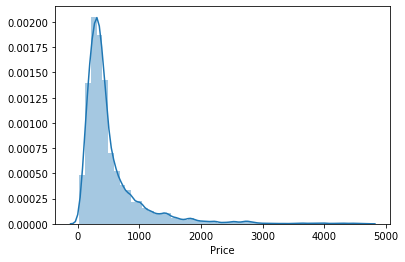

In [43]:
sns.distplot(train_label)
print(train_label.skew(), train_label.kurt())

0.28138777016636807 0.6013369879194741


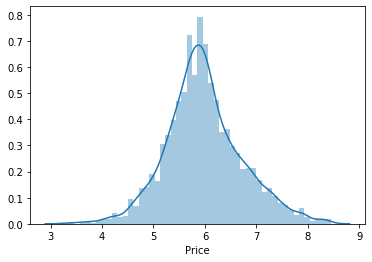

In [44]:
sns.distplot(np.log1p(train_label))
print(np.log1p(train_label).skew(), np.log1p(train_label).kurt())

In [45]:
train_label = train_label.apply(lambda x: np.log1p(x))

df = pd.DataFrame(pd.concat([train[c], test[c]], axis = 0), columns =train.columns)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for c in train.columns:
    if train[c].ftype == 'category:dense' :
        df[c] = le.fit_transform(pd.concat([train[c], test[c]], axis = 0))
    else :
        df[c] = pd.concat([train[c], test[c]], axis = 0)

In [46]:
pd.set_option('max_column',200)
train.head()

,Author,BookCategory,Title_count,Synopsis_count,Title_count_char,Synopsis_count_char,Genre_char,Title_n_st,Synopsis_n_st,Title_n_punct,Synopsis_n_punct,Title_title_word,Synopsis_title_word,Title_0,Title_1,Date,Edition_t,Review_t,Rating_t,Rat_Rev,Genre_t,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,...,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239
0,other,Action & Adventure,6,131,5.833333,6.038168,6.500000,0.166667,0.419847,0.0,0.0,0.833333,1.000000,1,1,3,Paperback,4.0,4.0,16.0,Action & Adventure (Books),0.227497,0.037319,-0.024557,-0.064571,0.022881,0.073397,-0.040549,0.049876,0.041945,-0.003507,-0.030269,-0.005953,0.009782,-0.001388,-0.012327,0.012301,0.018125,-0.038859,0.026550,0.035459,-0.050421,-0.007398,-0.006690,0.016642,0.006380,-0.019889,-0.039260,-0.044332,0.028953,0.005178,-0.007906,-0.012922,-0.008801,-0.009589,-0.019560,-0.021741,-0.037983,-0.012652,0.000480,-0.004247,-0.006188,0.005152,0.016184,0.030060,0.008715,-0.041850,0.007093,0.029562,-0.043998,-0.011190,-0.007283,0.000538,-0.016359,-0.009776,-0.021199,-0.019413,-0.003189,-0.013857,-0.025254,0.004140,-0.005228,-0.006545,0.024272,0.031534,0.019827,-0.055384,-0.044701,0.011204,0.005675,-0.028529,-0.011778,0.022719,-0.020952,-0.023971,-0.047293,-0.001201,0.011636,-0.006698,0.032535,...,-0.006989,-0.000655,0.004493,-0.000941,-0.003196,0.001895,-0.001785,-0.001488,-0.002072,0.002792,-0.000888,-0.001186,0.000175,0.005312,0.003916,-0.003281,-0.000026,0.002736,0.006093,-0.003910,9.988618e-01,-4.382510e-02,-9.882813e-03,-1.199796e-02,-2.760310e-03,-3.197336e-03,-2.001038e-12,4.888050e-03,-5.269081e-03,-4.342994e-03,7.786380e-05,-1.531704e-03,-1.733119e-03,-1.117860e-09,-2.179215e-03,-1.702610e-04,-1.188401e-03,1.498580e-04,-2.714964e-04,-1.327089e-03,-8.300768e-04,-4.978784e-06,-2.182969e-04,-1.130214e-04,-4.616515e-04,-8.697021e-04,5.251772e-05,-0.000695,-0.000560,0.001192,-0.000721,-0.000461,6.171598e-05,-0.000003,-0.000403,-0.000635,-0.001066,0.000669,-0.000007,-0.000158,-0.000287,-0.000149,-0.000171,-0.000168,-0.000514,-0.000087,-0.000207,0.000016,-0.000464,-0.000329,0.000027,-0.000288,0.000003,0.000007,-0.000339,-0.000612,0.000144,0.000573,-0.000211,-0.000006,0.000003,-0.000121,-0.000024,-0.000085,-0.000044,0.000051,-0.000070,-0.000201,-1.312200e-04,-0.000211,0.000025,0.000004,-0.000057,-0.000217,0.000050,0.000044,0.000022,0.000097,-0.000220,-0.000019
1,Arun Khopkar,"Biographies, Diaries & True Accounts",7,183,4.857143,6.262295,6.500000,0.285714,0.349727,0.0,0.0,1.000000,0.994536,2,5,7,Paperback,3.9,3.0,11.7,Cinema & Broadcast (Books),0.199184,-0.019315,-0.057323,0.027019,0.021092,-0.043797,-0.013296,-0.017546,-0.028214,0.051397,0.013809,0.041365,-0.003116,0.046166,0.017929,-0.012585,-0.028683,0.031933,0.014300,0.012789,-0.036091,0.027170,0.014913,-0.001528,-0.017038,-0.005856,-0.009528,-0.019819,-0.024384,-0.001499,-0.003816,-0.024203,-0.032643,0.019300,-0.036410,0.006766,-0.001416,-0.032835,-0.027100,0.016248,0.026516,0.014546,0.003881,0.057838,0.013535,-0.037694,0.013157,0.011927,0.004245,0.079151,0.018308,-0.049584,0.063299,-0.020158,-0.015353,0.022578,-0.014557,-0.039199,-0.001435,0.019204,-0.008336,-0.036876,0.005877,-0.010003,0.023885,0.021200,0.019427,0.018751,0.046030,0.072536,-0.011793,-0.038298,0.012215,0.012281,0.005371,0.017956,0.022487,0.038245,0.002458,...,0.006747,0.005529,-0.005510,0.003344,0.003267,-0.002065,0.000410,0.006014,-0.000613,-0.009794,0.006108,-0.001173,0.008420,-0.007930,-0.004381,0.003777,0.003922,0.005011,

In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df = pd.concat([train,test], axis = 0)
df.Author = le.fit_transform(df.Author)
df.Genre_t = le.fit_transform(df.Genre_t)
train.shape, test.shape

((6203, 261), (1560, 261))

In [48]:
train = df.iloc[:6203,:]
test = df.iloc[6203:,:]
test.reset_index(drop=True, inplace=True)

In [49]:
train = pd.get_dummies(train, drop_first=True)
test = pd.get_dummies(test, drop_first=True)
print(train.shape, test.shape)

(6203, 277) (1560, 277)


In [50]:
train.head()

,Author,Title_count,Synopsis_count,Title_count_char,Synopsis_count_char,Genre_char,Title_n_st,Synopsis_n_st,Title_n_punct,Synopsis_n_punct,Title_title_word,Synopsis_title_word,Title_0,Title_1,Date,Review_t,Rating_t,Rat_Rev,Genre_t,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,...,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,"BookCategory_Arts, Film & Photography","BookCategory_Biographies, Diaries & True Accounts",BookCategory_Comics & Mangas,"BookCategory_Computing, Internet & Digital Media","BookCategory_Crime, Thriller & Mystery",BookCategory_Humour,"BookCategory_Language, Linguistics & Writing",BookCategory_Politics,BookCategory_Romance,BookCategory_Sports,Edition_t_Flexibound,Edition_t_Hardcover,Edition_t_Loose Leaf,Edition_t_Mass Market Paperback,Edition_t_Paperback,Edition_t_Sheet music,Edition_t_bound,Edition_t_other
0,529,6,131,5.833333,6.038168,6.500000,0.166667,0.419847,0.0,0.0,0.833333,1.000000,1,1,3,4.0,4.0,16.0,1,0.227497,0.037319,-0.024557,-0.064571,0.022881,0.073397,-0.040549,0.049876,0.041945,-0.003507,-0.030269,-0.005953,0.009782,-0.001388,-0.012327,0.012301,0.018125,-0.038859,0.026550,0.035459,-0.050421,-0.007398,-0.006690,0.016642,0.006380,-0.019889,-0.039260,-0.044332,0.028953,0.005178,-0.007906,-0.012922,-0.008801,-0.009589,-0.019560,-0.021741,-0.037983,-0.012652,0.000480,-0.004247,-0.006188,0.005152,0.016184,0.030060,0.008715,-0.041850,0.007093,0.029562,-0.043998,-0.011190,-0.007283,0.000538,-0.016359,-0.009776,-0.021199,-0.019413,-0.003189,-0.013857,-0.025254,0.004140,-0.005228,-0.006545,0.024272,0.031534,0.019827,-0.055384,-0.044701,0.011204,0.005675,-0.028529,-0.011778,0.022719,-0.020952,-0.023971,-0.047293,-0.001201,0.011636,-0.006698,0.032535,-0.012168,0.085768,...,0.006093,-0.003910,9.988618e-01,-4.382510e-02,-9.882813e-03,-1.199796e-02,-2.760310e-03,-3.197336e-03,-2.001038e-12,4.888050e-03,-5.269081e-03,-4.342994e-03,7.786380e-05,-1.531704e-03,-1.733119e-03,-1.117860e-09,-2.179215e-03,-1.702610e-04,-1.188401e-03,1.498580e-04,-2.714964e-04,-1.327089e-03,-8.300768e-04,-4.978784e-06,-2.182969e-04,-1.130214e-04,-4.616515e-04,-8.697021e-04,5.251772e-05,-0.000695,-0.000560,0.001192,-0.000721,-0.000461,6.171598e-05,-0.000003,-0.000403,-0.000635,-0.001066,0.000669,-0.000007,-0.000158,-0.000287,-0.000149,-0.000171,-0.000168,-0.000514,-0.000087,-0.000207,0.000016,-0.000464,-0.000329,0.000027,-0.000288,0.000003,0.000007,-0.000339,-0.000612,0.000144,0.000573,-0.000211,-0.000006,0.000003,-0.000121,-0.000024,-0.000085,-0.000044,0.000051,-0.000070,-0.000201,-1.312200e-04,-0.000211,0.000025,0.000004,-0.000057,-0.000217,0.000050,0.000044,0.000022,0.000097,-0.000220,-0.000019,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,36,7,183,4.857143,6.262295,6.500000,0.285714,0.349727,0.0,0.0,1.000000,0.994536,2,5,7,3.9,3.0,11.7,49,0.199184,-0.019315,-0.057323,0.027019,0.021092,-0.043797,-0.013296,-0.017546,-0.028214,0.051397,0.013809,0.041365,-0.003116,0.046166,0.017929,-0.012585,-0.028683,0.031933,0.014300,0.012789,-0.036091,0.027170,0.014913,-0.001528,-0.017038,-0.005856,-0.009528,-0.019819,-0.024384,-0.001499,-0.003816,-0.024203,-0.032643,0.019300,-0.036410,0.006766,-0.001416,-0.032835,-0.027100,0.016248,0.026516,0.014546,0.003881,0.057838,0.013535,-0.037694,0.013157,0.011927,0.004245,0.079151,0.018308,-0.049584,0.063299,-0.020158,-0.015353,0.022578,-0.014557,-0.039199,-0.001435,0.019204,-0.008336,-0.036876,0.005877,-0.010003,0.023885,0.021200,0.019427,0.018751,0.046030,0.072536,-0.011793,-0.038298,0.012215,0.012281,0.005371,0.017956,0.022487,0.038245,0.002458,0.018413

In [51]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)
train_label.reset_index(drop=True, inplace=True)

In [52]:
#from sklearn.preprocessing import MinMaxScaler
#mmx = MinMaxScaler()
#train = pd.DataFrame(mmx.fit_transform(train), columns = train.columns)
#test = pd.DataFrame(mmx.fit_transform(test), columns = test.columns)

In [53]:
train.shape, test.shape

((6203, 277), (1560, 277))

# ML

In [54]:
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

In [55]:
score = cross_val_score(xgb.XGBRegressor(), train, train_label, scoring='neg_mean_squared_error', cv=3)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:24:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:24:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:24:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [56]:
score

array([-0.30132403, -0.2779746 , -0.32360279])

In [57]:
param_xgb = {}
param_xgb['learning_rate'] = 0.06
param_xgb['seed'] = 51
param_xgb['eval_metric'] = 'rmse'
param_xgb['objective'] = 'reg:linear'

param_lgb = {}
param_lgb['objective'] = 'regression'
param_lgb['learning_rate'] = 0.03
param_lgb['seed'] = 19
param_lgb['metric'] = 'rmse'

def func(train, train_label, test, name):
    pred = pd.DataFrame(data = np.zeros(shape = (train.shape[0], 3)))
    pred.columns = [a for a in range(3)]
    
    pred_test = pd.DataFrame(data = np.zeros(shape = (test.shape[0], 3)))
    pred_test.columns = [a for a in range(3)]
    
    k = KFold(n_splits=3, shuffle=True, random_state=24743)
    i = 0
    for t_index, v_index in k.split(train_label.ravel()):
        xtrain , ytrain = train.loc[t_index,:], train_label[t_index]
        xtest , ytest = train.loc[v_index,:], train_label[v_index]
        if(name == 'lgb'):
            trainset = lgb.Dataset(xtrain, label=ytrain)
            testset = lgb.Dataset(xtest, label=ytest)
            best = lgb.train(param_lgb , trainset, valid_sets=[trainset,testset], num_boost_round=10000,
                             early_stopping_rounds= 200)
            pred.loc[v_index,i] = best.predict(xtest, best_iteration = best.best_iteration)
            
            pred_test.loc[:,i] = best.predict(test, best_iteration = best.best_iteration)
            i = i +1
            
        else : 
            trainset = xgb.DMatrix(xtrain, label=ytrain)
            testset = xgb.DMatrix(xtest,label=ytest)
            t = xgb.DMatrix(test)
            best = xgb.train(list(param_xgb.items()) ,trainset, evals=[(trainset, 'train'),(testset,'test')],
                    num_boost_round=10000, early_stopping_rounds= 200)
            pred.loc[v_index,i] = best.predict(testset, ntree_limit = best.best_ntree_limit)
            
            pred_test.loc[:,i] = best.predict(t, ntree_limit = best.best_ntree_limit)
            i = i +1
    
    return(pred,pred_test,best)

In [58]:
train_xgb, test_xgb, model = func(train,train_label, test, 'xgb')

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:24:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:5.20808	test-rmse:5.19812
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 200 rounds.
[1]	train-rmse:4.90097	test-rmse:4.89178
[2]	train-rmse:4.61253	test-rmse:4.60428
[3]	train-rmse:4.34161	test-rmse:4.33448
[4]	train-rmse:4.08726	test-rmse:4.08136
[5]	train-rmse:3.84842	test-rmse:3.8434
[6]	train-rmse:3.6239	test-rmse:3.62031
[7]	train-rmse:3.41326	test-rmse:3.41051
[8]	train-rmse:3.21535	test-rmse:3.21404
[9]	train-rmse:3.02961	test-rmse:3.0291
[10]	train-rmse:2.85534	test-rmse:2.85614
[11]	train-rmse:2.69156	test-rmse:2.69416
[12]	train-rmse:2.53794	test-rmse:2.54259
[13]	train-rmse:2.39357	test-rmse:2.40008
[14]	train-rmse:2.25835	test-rmse:2.26674
[15]	train-rmse:2.13115	test-rmse:2.1415
[16]	train-rmse:2.01198	test-rmse:2.02425
[17]	train-rmse:1.90042	test-rmse:1.9144

[182]	train-rmse:0.180523	test-rmse:0.52781
[183]	train-rmse:0.179574	test-rmse:0.527752
[184]	train-rmse:0.178647	test-rmse:0.527832
[185]	train-rmse:0.177885	test-rmse:0.527782
[186]	train-rmse:0.177195	test-rmse:0.527854
[187]	train-rmse:0.176632	test-rmse:0.52783
[188]	train-rmse:0.176113	test-rmse:0.527626
[189]	train-rmse:0.175315	test-rmse:0.527495
[190]	train-rmse:0.174687	test-rmse:0.527455
[191]	train-rmse:0.174095	test-rmse:0.527392
[192]	train-rmse:0.173055	test-rmse:0.52745
[193]	train-rmse:0.172085	test-rmse:0.527294
[194]	train-rmse:0.17123	test-rmse:0.527348
[195]	train-rmse:0.17066	test-rmse:0.527398
[196]	train-rmse:0.170236	test-rmse:0.527426
[197]	train-rmse:0.1696	test-rmse:0.527399
[198]	train-rmse:0.169208	test-rmse:0.527348
[199]	train-rmse:0.168582	test-rmse:0.527371
[200]	train-rmse:0.167472	test-rmse:0.5272
[201]	train-rmse:0.166747	test-rmse:0.52718
[202]	train-rmse:0.165629	test-rmse:0.527157
[203]	train-rmse:0.164985	test-rmse:0.527138
[204]	train-rmse:0.1

[365]	train-rmse:0.079361	test-rmse:0.525595
[366]	train-rmse:0.07895	test-rmse:0.52563
[367]	train-rmse:0.078642	test-rmse:0.525615
[368]	train-rmse:0.078267	test-rmse:0.525592
[369]	train-rmse:0.077938	test-rmse:0.525538
[370]	train-rmse:0.077498	test-rmse:0.525503
[371]	train-rmse:0.077117	test-rmse:0.52547
[372]	train-rmse:0.076873	test-rmse:0.525473
[373]	train-rmse:0.076604	test-rmse:0.525488
[374]	train-rmse:0.076048	test-rmse:0.525432
[375]	train-rmse:0.075847	test-rmse:0.525392
[376]	train-rmse:0.075438	test-rmse:0.525356
[377]	train-rmse:0.075137	test-rmse:0.52536
[378]	train-rmse:0.074878	test-rmse:0.525379
[379]	train-rmse:0.074655	test-rmse:0.525422
[380]	train-rmse:0.074498	test-rmse:0.525431
[381]	train-rmse:0.074315	test-rmse:0.525443
[382]	train-rmse:0.073986	test-rmse:0.525501
[383]	train-rmse:0.073683	test-rmse:0.525437
[384]	train-rmse:0.073467	test-rmse:0.525427
[385]	train-rmse:0.072958	test-rmse:0.525432
[386]	train-rmse:0.072785	test-rmse:0.525427
[387]	train-rm

[548]	train-rmse:0.043261	test-rmse:0.525196
[549]	train-rmse:0.043087	test-rmse:0.525186
[550]	train-rmse:0.042937	test-rmse:0.525194
[551]	train-rmse:0.042832	test-rmse:0.525206
[552]	train-rmse:0.042629	test-rmse:0.525228
[553]	train-rmse:0.042427	test-rmse:0.52521
[554]	train-rmse:0.042241	test-rmse:0.525199
[555]	train-rmse:0.041999	test-rmse:0.525202
[556]	train-rmse:0.041957	test-rmse:0.52521
[557]	train-rmse:0.041859	test-rmse:0.525208
[558]	train-rmse:0.041698	test-rmse:0.525215
[559]	train-rmse:0.041607	test-rmse:0.525231
[560]	train-rmse:0.041491	test-rmse:0.525247
[561]	train-rmse:0.041469	test-rmse:0.525258
[562]	train-rmse:0.041412	test-rmse:0.525257
[563]	train-rmse:0.041357	test-rmse:0.525247
[564]	train-rmse:0.04116	test-rmse:0.525236
[565]	train-rmse:0.041111	test-rmse:0.525252
[566]	train-rmse:0.041046	test-rmse:0.525239
[567]	train-rmse:0.040926	test-rmse:0.525248
[568]	train-rmse:0.040895	test-rmse:0.525251
[569]	train-rmse:0.04084	test-rmse:0.52525
[570]	train-rms

[41]	train-rmse:0.60982	test-rmse:0.711963
[42]	train-rmse:0.590324	test-rmse:0.695445
[43]	train-rmse:0.572674	test-rmse:0.68049
[44]	train-rmse:0.55607	test-rmse:0.666936
[45]	train-rmse:0.540544	test-rmse:0.655093
[46]	train-rmse:0.526522	test-rmse:0.643809
[47]	train-rmse:0.513255	test-rmse:0.633847
[48]	train-rmse:0.500547	test-rmse:0.624519
[49]	train-rmse:0.489327	test-rmse:0.615974
[50]	train-rmse:0.478799	test-rmse:0.608128
[51]	train-rmse:0.469187	test-rmse:0.601342
[52]	train-rmse:0.46024	test-rmse:0.59546
[53]	train-rmse:0.45122	test-rmse:0.58943
[54]	train-rmse:0.442309	test-rmse:0.584249
[55]	train-rmse:0.435183	test-rmse:0.579623
[56]	train-rmse:0.427772	test-rmse:0.575424
[57]	train-rmse:0.421077	test-rmse:0.571563
[58]	train-rmse:0.414246	test-rmse:0.568114
[59]	train-rmse:0.407769	test-rmse:0.564863
[60]	train-rmse:0.401996	test-rmse:0.562232
[61]	train-rmse:0.396384	test-rmse:0.559396
[62]	train-rmse:0.391525	test-rmse:0.556415
[63]	train-rmse:0.386626	test-rmse:0.55

[226]	train-rmse:0.154543	test-rmse:0.5135
[227]	train-rmse:0.15378	test-rmse:0.51335
[228]	train-rmse:0.153336	test-rmse:0.51335
[229]	train-rmse:0.152764	test-rmse:0.513398
[230]	train-rmse:0.152122	test-rmse:0.513365
[231]	train-rmse:0.151284	test-rmse:0.513274
[232]	train-rmse:0.150284	test-rmse:0.513333
[233]	train-rmse:0.149627	test-rmse:0.513335
[234]	train-rmse:0.14919	test-rmse:0.513277
[235]	train-rmse:0.14887	test-rmse:0.513243
[236]	train-rmse:0.14866	test-rmse:0.513222
[237]	train-rmse:0.148004	test-rmse:0.513259
[238]	train-rmse:0.147294	test-rmse:0.513284
[239]	train-rmse:0.146991	test-rmse:0.513212
[240]	train-rmse:0.146073	test-rmse:0.513037
[241]	train-rmse:0.145139	test-rmse:0.513105
[242]	train-rmse:0.144627	test-rmse:0.513134
[243]	train-rmse:0.14377	test-rmse:0.513139
[244]	train-rmse:0.142692	test-rmse:0.513163
[245]	train-rmse:0.142292	test-rmse:0.513188
[246]	train-rmse:0.141645	test-rmse:0.513125
[247]	train-rmse:0.141102	test-rmse:0.51309
[248]	train-rmse:0.1

[409]	train-rmse:0.075136	test-rmse:0.51003
[410]	train-rmse:0.07483	test-rmse:0.509981
[411]	train-rmse:0.074653	test-rmse:0.510004
[412]	train-rmse:0.074383	test-rmse:0.509988
[413]	train-rmse:0.07416	test-rmse:0.509978
[414]	train-rmse:0.0738	test-rmse:0.509943
[415]	train-rmse:0.07357	test-rmse:0.509903
[416]	train-rmse:0.07335	test-rmse:0.509928
[417]	train-rmse:0.073089	test-rmse:0.509948
[418]	train-rmse:0.072887	test-rmse:0.509978
[419]	train-rmse:0.072692	test-rmse:0.509966
[420]	train-rmse:0.072358	test-rmse:0.510029
[421]	train-rmse:0.072122	test-rmse:0.510043
[422]	train-rmse:0.071954	test-rmse:0.510023
[423]	train-rmse:0.071719	test-rmse:0.510025
[424]	train-rmse:0.071554	test-rmse:0.510021
[425]	train-rmse:0.071404	test-rmse:0.510026
[426]	train-rmse:0.070942	test-rmse:0.510066
[427]	train-rmse:0.070737	test-rmse:0.510089
[428]	train-rmse:0.070331	test-rmse:0.510092
[429]	train-rmse:0.0699	test-rmse:0.510075
[430]	train-rmse:0.069579	test-rmse:0.510062
[431]	train-rmse:0.

[593]	train-rmse:0.040533	test-rmse:0.509913
[594]	train-rmse:0.040431	test-rmse:0.509922
[595]	train-rmse:0.040351	test-rmse:0.509931
[596]	train-rmse:0.040276	test-rmse:0.509937
[597]	train-rmse:0.040074	test-rmse:0.509937
[598]	train-rmse:0.039829	test-rmse:0.509959
[599]	train-rmse:0.039688	test-rmse:0.509969
[600]	train-rmse:0.03951	test-rmse:0.509972
[601]	train-rmse:0.03943	test-rmse:0.509981
[602]	train-rmse:0.039359	test-rmse:0.509967
[603]	train-rmse:0.039312	test-rmse:0.509974
[604]	train-rmse:0.039208	test-rmse:0.509982
[605]	train-rmse:0.039175	test-rmse:0.509984
[606]	train-rmse:0.039113	test-rmse:0.509986
[607]	train-rmse:0.038942	test-rmse:0.509997
[608]	train-rmse:0.038883	test-rmse:0.510004
[609]	train-rmse:0.038799	test-rmse:0.509997
[610]	train-rmse:0.038725	test-rmse:0.510003
[611]	train-rmse:0.038671	test-rmse:0.509999
[612]	train-rmse:0.038489	test-rmse:0.509996
[613]	train-rmse:0.038328	test-rmse:0.510013
[614]	train-rmse:0.038156	test-rmse:0.510029
[615]	train-

[7]	train-rmse:3.41127	test-rmse:3.40992
[8]	train-rmse:3.21366	test-rmse:3.21153
[9]	train-rmse:3.0282	test-rmse:3.02617
[10]	train-rmse:2.85413	test-rmse:2.85179
[11]	train-rmse:2.69067	test-rmse:2.68839
[12]	train-rmse:2.53701	test-rmse:2.5351
[13]	train-rmse:2.39296	test-rmse:2.39203
[14]	train-rmse:2.25807	test-rmse:2.25739
[15]	train-rmse:2.13137	test-rmse:2.13232
[16]	train-rmse:2.01241	test-rmse:2.01442
[17]	train-rmse:1.90083	test-rmse:1.90377
[18]	train-rmse:1.79628	test-rmse:1.80032
[19]	train-rmse:1.69818	test-rmse:1.70346
[20]	train-rmse:1.60644	test-rmse:1.61369
[21]	train-rmse:1.52044	test-rmse:1.52886
[22]	train-rmse:1.43991	test-rmse:1.45019
[23]	train-rmse:1.36446	test-rmse:1.37674
[24]	train-rmse:1.29396	test-rmse:1.30895
[25]	train-rmse:1.22808	test-rmse:1.24531
[26]	train-rmse:1.1661	test-rmse:1.18672
[27]	train-rmse:1.10824	test-rmse:1.13264
[28]	train-rmse:1.05434	test-rmse:1.08201
[29]	train-rmse:1.00368	test-rmse:1.03555
[30]	train-rmse:0.95671	test-rmse:0.9921

[194]	train-rmse:0.161402	test-rmse:0.525492
[195]	train-rmse:0.160238	test-rmse:0.525579
[196]	train-rmse:0.1591	test-rmse:0.52552
[197]	train-rmse:0.15837	test-rmse:0.52543
[198]	train-rmse:0.157412	test-rmse:0.525461
[199]	train-rmse:0.156905	test-rmse:0.525456
[200]	train-rmse:0.156433	test-rmse:0.525429
[201]	train-rmse:0.155659	test-rmse:0.525448
[202]	train-rmse:0.154449	test-rmse:0.525459
[203]	train-rmse:0.154006	test-rmse:0.525398
[204]	train-rmse:0.152916	test-rmse:0.52545
[205]	train-rmse:0.152314	test-rmse:0.525423
[206]	train-rmse:0.151492	test-rmse:0.52545
[207]	train-rmse:0.150351	test-rmse:0.525449
[208]	train-rmse:0.149681	test-rmse:0.525386
[209]	train-rmse:0.148677	test-rmse:0.525365
[210]	train-rmse:0.147931	test-rmse:0.525311
[211]	train-rmse:0.147504	test-rmse:0.525221
[212]	train-rmse:0.14693	test-rmse:0.525214
[213]	train-rmse:0.146186	test-rmse:0.525144
[214]	train-rmse:0.145113	test-rmse:0.525131
[215]	train-rmse:0.144159	test-rmse:0.52523
[216]	train-rmse:0.

[377]	train-rmse:0.071924	test-rmse:0.523838
[378]	train-rmse:0.071785	test-rmse:0.523857
[379]	train-rmse:0.071291	test-rmse:0.523874
[380]	train-rmse:0.070846	test-rmse:0.523841
[381]	train-rmse:0.070426	test-rmse:0.523826
[382]	train-rmse:0.070348	test-rmse:0.523833
[383]	train-rmse:0.06999	test-rmse:0.523796
[384]	train-rmse:0.069871	test-rmse:0.523804
[385]	train-rmse:0.069639	test-rmse:0.52379
[386]	train-rmse:0.069469	test-rmse:0.52383
[387]	train-rmse:0.069241	test-rmse:0.523814
[388]	train-rmse:0.069044	test-rmse:0.52382
[389]	train-rmse:0.068885	test-rmse:0.523849
[390]	train-rmse:0.068506	test-rmse:0.523861
[391]	train-rmse:0.068137	test-rmse:0.523826
[392]	train-rmse:0.068088	test-rmse:0.523831
[393]	train-rmse:0.06776	test-rmse:0.523846
[394]	train-rmse:0.067659	test-rmse:0.523854
[395]	train-rmse:0.067252	test-rmse:0.523819
[396]	train-rmse:0.066957	test-rmse:0.523847
[397]	train-rmse:0.066615	test-rmse:0.523803
[398]	train-rmse:0.066517	test-rmse:0.523789
[399]	train-rms

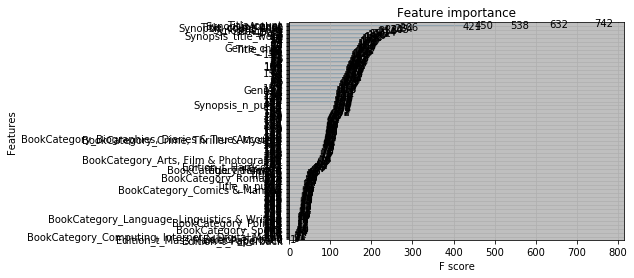

In [59]:
xgb.plot_importance(model)

In [60]:
train_lgb, test_lgb ,model = func(train,train_label,test,'lgb')

[1]	training's rmse: 0.732367	valid_1's rmse: 0.754903
Training until validation scores don't improve for 200 rounds.
[2]	training's rmse: 0.729579	valid_1's rmse: 0.752511
[3]	training's rmse: 0.726823	valid_1's rmse: 0.750182
[4]	training's rmse: 0.724092	valid_1's rmse: 0.747972
[5]	training's rmse: 0.721406	valid_1's rmse: 0.745666
[6]	training's rmse: 0.718785	valid_1's rmse: 0.743465
[7]	training's rmse: 0.716171	valid_1's rmse: 0.741399
[8]	training's rmse: 0.713595	valid_1's rmse: 0.73922
[9]	training's rmse: 0.711076	valid_1's rmse: 0.737177
[10]	training's rmse: 0.708584	valid_1's rmse: 0.735098
[11]	training's rmse: 0.706123	valid_1's rmse: 0.733188
[12]	training's rmse: 0.703697	valid_1's rmse: 0.731238
[13]	training's rmse: 0.701259	valid_1's rmse: 0.729182
[14]	training's rmse: 0.69888	valid_1's rmse: 0.727088
[15]	training's rmse: 0.696546	valid_1's rmse: 0.725218
[16]	training's rmse: 0.694189	valid_1's rmse: 0.723231
[17]	training's rmse: 0.691948	valid_1's rmse: 0.721

[150]	training's rmse: 0.513983	valid_1's rmse: 0.600648
[151]	training's rmse: 0.513105	valid_1's rmse: 0.600178
[152]	training's rmse: 0.512275	valid_1's rmse: 0.599786
[153]	training's rmse: 0.511355	valid_1's rmse: 0.59925
[154]	training's rmse: 0.51059	valid_1's rmse: 0.598991
[155]	training's rmse: 0.509786	valid_1's rmse: 0.598529
[156]	training's rmse: 0.508985	valid_1's rmse: 0.598136
[157]	training's rmse: 0.508101	valid_1's rmse: 0.597642
[158]	training's rmse: 0.507231	valid_1's rmse: 0.597236
[159]	training's rmse: 0.506431	valid_1's rmse: 0.59681
[160]	training's rmse: 0.505624	valid_1's rmse: 0.596443
[161]	training's rmse: 0.504778	valid_1's rmse: 0.596024
[162]	training's rmse: 0.503924	valid_1's rmse: 0.595578
[163]	training's rmse: 0.50319	valid_1's rmse: 0.595461
[164]	training's rmse: 0.502372	valid_1's rmse: 0.595077
[165]	training's rmse: 0.501595	valid_1's rmse: 0.594711
[166]	training's rmse: 0.500786	valid_1's rmse: 0.594358
[167]	training's rmse: 0.499914	val

[297]	training's rmse: 0.419294	valid_1's rmse: 0.562007
[298]	training's rmse: 0.418786	valid_1's rmse: 0.561802
[299]	training's rmse: 0.418288	valid_1's rmse: 0.561638
[300]	training's rmse: 0.417804	valid_1's rmse: 0.56148
[301]	training's rmse: 0.41729	valid_1's rmse: 0.561315
[302]	training's rmse: 0.416807	valid_1's rmse: 0.561096
[303]	training's rmse: 0.41631	valid_1's rmse: 0.560961
[304]	training's rmse: 0.415797	valid_1's rmse: 0.560775
[305]	training's rmse: 0.415292	valid_1's rmse: 0.560627
[306]	training's rmse: 0.414813	valid_1's rmse: 0.560462
[307]	training's rmse: 0.414345	valid_1's rmse: 0.560272
[308]	training's rmse: 0.41386	valid_1's rmse: 0.560051
[309]	training's rmse: 0.413364	valid_1's rmse: 0.55991
[310]	training's rmse: 0.41291	valid_1's rmse: 0.559829
[311]	training's rmse: 0.412458	valid_1's rmse: 0.559686
[312]	training's rmse: 0.411948	valid_1's rmse: 0.5595
[313]	training's rmse: 0.41142	valid_1's rmse: 0.559311
[314]	training's rmse: 0.41096	valid_1's

[442]	training's rmse: 0.357353	valid_1's rmse: 0.54541
[443]	training's rmse: 0.356967	valid_1's rmse: 0.545352
[444]	training's rmse: 0.35659	valid_1's rmse: 0.54528
[445]	training's rmse: 0.356228	valid_1's rmse: 0.545181
[446]	training's rmse: 0.35585	valid_1's rmse: 0.54507
[447]	training's rmse: 0.355489	valid_1's rmse: 0.545039
[448]	training's rmse: 0.3551	valid_1's rmse: 0.544919
[449]	training's rmse: 0.354723	valid_1's rmse: 0.544796
[450]	training's rmse: 0.354354	valid_1's rmse: 0.544749
[451]	training's rmse: 0.353996	valid_1's rmse: 0.544661
[452]	training's rmse: 0.35364	valid_1's rmse: 0.544544
[453]	training's rmse: 0.353279	valid_1's rmse: 0.544419
[454]	training's rmse: 0.352908	valid_1's rmse: 0.544367
[455]	training's rmse: 0.352536	valid_1's rmse: 0.544254
[456]	training's rmse: 0.352155	valid_1's rmse: 0.544188
[457]	training's rmse: 0.351809	valid_1's rmse: 0.544083
[458]	training's rmse: 0.351452	valid_1's rmse: 0.543998
[459]	training's rmse: 0.351063	valid_1

[590]	training's rmse: 0.308816	valid_1's rmse: 0.536261
[591]	training's rmse: 0.308546	valid_1's rmse: 0.536183
[592]	training's rmse: 0.30824	valid_1's rmse: 0.53613
[593]	training's rmse: 0.307928	valid_1's rmse: 0.536081
[594]	training's rmse: 0.307621	valid_1's rmse: 0.536013
[595]	training's rmse: 0.307335	valid_1's rmse: 0.536013
[596]	training's rmse: 0.307047	valid_1's rmse: 0.535947
[597]	training's rmse: 0.306759	valid_1's rmse: 0.535895
[598]	training's rmse: 0.306495	valid_1's rmse: 0.535835
[599]	training's rmse: 0.306207	valid_1's rmse: 0.535795
[600]	training's rmse: 0.305934	valid_1's rmse: 0.535806
[601]	training's rmse: 0.305669	valid_1's rmse: 0.535789
[602]	training's rmse: 0.305405	valid_1's rmse: 0.535735
[603]	training's rmse: 0.30516	valid_1's rmse: 0.535677
[604]	training's rmse: 0.30488	valid_1's rmse: 0.535614
[605]	training's rmse: 0.30464	valid_1's rmse: 0.535549
[606]	training's rmse: 0.304358	valid_1's rmse: 0.535476
[607]	training's rmse: 0.304085	vali

[737]	training's rmse: 0.271259	valid_1's rmse: 0.529972
[738]	training's rmse: 0.271016	valid_1's rmse: 0.529933
[739]	training's rmse: 0.270801	valid_1's rmse: 0.529921
[740]	training's rmse: 0.270583	valid_1's rmse: 0.529896
[741]	training's rmse: 0.270374	valid_1's rmse: 0.529859
[742]	training's rmse: 0.270142	valid_1's rmse: 0.529818
[743]	training's rmse: 0.269873	valid_1's rmse: 0.529773
[744]	training's rmse: 0.269657	valid_1's rmse: 0.529738
[745]	training's rmse: 0.269457	valid_1's rmse: 0.529696
[746]	training's rmse: 0.269234	valid_1's rmse: 0.529636
[747]	training's rmse: 0.268976	valid_1's rmse: 0.529587
[748]	training's rmse: 0.268725	valid_1's rmse: 0.529558
[749]	training's rmse: 0.268515	valid_1's rmse: 0.529521
[750]	training's rmse: 0.268311	valid_1's rmse: 0.529495
[751]	training's rmse: 0.268122	valid_1's rmse: 0.529465
[752]	training's rmse: 0.267915	valid_1's rmse: 0.529452
[753]	training's rmse: 0.267724	valid_1's rmse: 0.529399
[754]	training's rmse: 0.267528

[883]	training's rmse: 0.241189	valid_1's rmse: 0.52589
[884]	training's rmse: 0.240997	valid_1's rmse: 0.525873
[885]	training's rmse: 0.240813	valid_1's rmse: 0.525859
[886]	training's rmse: 0.240623	valid_1's rmse: 0.525834
[887]	training's rmse: 0.240427	valid_1's rmse: 0.525852
[888]	training's rmse: 0.240243	valid_1's rmse: 0.525801
[889]	training's rmse: 0.240072	valid_1's rmse: 0.525783
[890]	training's rmse: 0.239895	valid_1's rmse: 0.525745
[891]	training's rmse: 0.239713	valid_1's rmse: 0.525725
[892]	training's rmse: 0.239536	valid_1's rmse: 0.525671
[893]	training's rmse: 0.239356	valid_1's rmse: 0.525636
[894]	training's rmse: 0.239149	valid_1's rmse: 0.525644
[895]	training's rmse: 0.238968	valid_1's rmse: 0.525649
[896]	training's rmse: 0.238783	valid_1's rmse: 0.525619
[897]	training's rmse: 0.238562	valid_1's rmse: 0.525612
[898]	training's rmse: 0.238374	valid_1's rmse: 0.525583
[899]	training's rmse: 0.238179	valid_1's rmse: 0.525579
[900]	training's rmse: 0.237995	

[1027]	training's rmse: 0.215993	valid_1's rmse: 0.523644
[1028]	training's rmse: 0.215831	valid_1's rmse: 0.523624
[1029]	training's rmse: 0.215681	valid_1's rmse: 0.523635
[1030]	training's rmse: 0.21551	valid_1's rmse: 0.523643
[1031]	training's rmse: 0.215333	valid_1's rmse: 0.523633
[1032]	training's rmse: 0.215133	valid_1's rmse: 0.523613
[1033]	training's rmse: 0.214975	valid_1's rmse: 0.523606
[1034]	training's rmse: 0.21483	valid_1's rmse: 0.523623
[1035]	training's rmse: 0.214646	valid_1's rmse: 0.523585
[1036]	training's rmse: 0.214485	valid_1's rmse: 0.523568
[1037]	training's rmse: 0.2143	valid_1's rmse: 0.523544
[1038]	training's rmse: 0.214155	valid_1's rmse: 0.523555
[1039]	training's rmse: 0.213991	valid_1's rmse: 0.523504
[1040]	training's rmse: 0.213855	valid_1's rmse: 0.523487
[1041]	training's rmse: 0.213699	valid_1's rmse: 0.523487
[1042]	training's rmse: 0.213534	valid_1's rmse: 0.523455
[1043]	training's rmse: 0.213366	valid_1's rmse: 0.52345
[1044]	training's r

[1170]	training's rmse: 0.194516	valid_1's rmse: 0.522325
[1171]	training's rmse: 0.19438	valid_1's rmse: 0.522314
[1172]	training's rmse: 0.194244	valid_1's rmse: 0.522298
[1173]	training's rmse: 0.194091	valid_1's rmse: 0.522287
[1174]	training's rmse: 0.193957	valid_1's rmse: 0.522261
[1175]	training's rmse: 0.193813	valid_1's rmse: 0.522251
[1176]	training's rmse: 0.193677	valid_1's rmse: 0.522244
[1177]	training's rmse: 0.19354	valid_1's rmse: 0.522255
[1178]	training's rmse: 0.193417	valid_1's rmse: 0.522249
[1179]	training's rmse: 0.193282	valid_1's rmse: 0.522247
[1180]	training's rmse: 0.193137	valid_1's rmse: 0.522245
[1181]	training's rmse: 0.192997	valid_1's rmse: 0.522238
[1182]	training's rmse: 0.192862	valid_1's rmse: 0.522242
[1183]	training's rmse: 0.192724	valid_1's rmse: 0.522245
[1184]	training's rmse: 0.192569	valid_1's rmse: 0.522241
[1185]	training's rmse: 0.192439	valid_1's rmse: 0.522234
[1186]	training's rmse: 0.192306	valid_1's rmse: 0.522226
[1187]	training'

[1312]	training's rmse: 0.175642	valid_1's rmse: 0.52169
[1313]	training's rmse: 0.175524	valid_1's rmse: 0.521686
[1314]	training's rmse: 0.175372	valid_1's rmse: 0.521667
[1315]	training's rmse: 0.175214	valid_1's rmse: 0.52165
[1316]	training's rmse: 0.175092	valid_1's rmse: 0.521621
[1317]	training's rmse: 0.174957	valid_1's rmse: 0.521622
[1318]	training's rmse: 0.17483	valid_1's rmse: 0.521632
[1319]	training's rmse: 0.174691	valid_1's rmse: 0.521628
[1320]	training's rmse: 0.174579	valid_1's rmse: 0.521625
[1321]	training's rmse: 0.174441	valid_1's rmse: 0.521612
[1322]	training's rmse: 0.17431	valid_1's rmse: 0.521604
[1323]	training's rmse: 0.1742	valid_1's rmse: 0.521599
[1324]	training's rmse: 0.174055	valid_1's rmse: 0.521572
[1325]	training's rmse: 0.173898	valid_1's rmse: 0.521558
[1326]	training's rmse: 0.173797	valid_1's rmse: 0.521568
[1327]	training's rmse: 0.173685	valid_1's rmse: 0.521553
[1328]	training's rmse: 0.173536	valid_1's rmse: 0.52154
[1329]	training's rms

[1456]	training's rmse: 0.158841	valid_1's rmse: 0.520965
[1457]	training's rmse: 0.158745	valid_1's rmse: 0.520965
[1458]	training's rmse: 0.15864	valid_1's rmse: 0.520968
[1459]	training's rmse: 0.158531	valid_1's rmse: 0.520967
[1460]	training's rmse: 0.158403	valid_1's rmse: 0.520956
[1461]	training's rmse: 0.158291	valid_1's rmse: 0.520953
[1462]	training's rmse: 0.158174	valid_1's rmse: 0.520953
[1463]	training's rmse: 0.158063	valid_1's rmse: 0.520947
[1464]	training's rmse: 0.157935	valid_1's rmse: 0.520937
[1465]	training's rmse: 0.157805	valid_1's rmse: 0.520927
[1466]	training's rmse: 0.157701	valid_1's rmse: 0.520919
[1467]	training's rmse: 0.157585	valid_1's rmse: 0.520924
[1468]	training's rmse: 0.157475	valid_1's rmse: 0.520923
[1469]	training's rmse: 0.157367	valid_1's rmse: 0.520912
[1470]	training's rmse: 0.15725	valid_1's rmse: 0.520929
[1471]	training's rmse: 0.157142	valid_1's rmse: 0.520923
[1472]	training's rmse: 0.157052	valid_1's rmse: 0.520929
[1473]	training'

[1602]	training's rmse: 0.143592	valid_1's rmse: 0.520491
[1603]	training's rmse: 0.143498	valid_1's rmse: 0.520481
[1604]	training's rmse: 0.143411	valid_1's rmse: 0.52047
[1605]	training's rmse: 0.143323	valid_1's rmse: 0.520472
[1606]	training's rmse: 0.143232	valid_1's rmse: 0.520475
[1607]	training's rmse: 0.14313	valid_1's rmse: 0.520485
[1608]	training's rmse: 0.143034	valid_1's rmse: 0.520471
[1609]	training's rmse: 0.14295	valid_1's rmse: 0.520469
[1610]	training's rmse: 0.142865	valid_1's rmse: 0.520457
[1611]	training's rmse: 0.142769	valid_1's rmse: 0.520454
[1612]	training's rmse: 0.142695	valid_1's rmse: 0.520444
[1613]	training's rmse: 0.142589	valid_1's rmse: 0.520449
[1614]	training's rmse: 0.142502	valid_1's rmse: 0.520443
[1615]	training's rmse: 0.142418	valid_1's rmse: 0.520443
[1616]	training's rmse: 0.142291	valid_1's rmse: 0.520444
[1617]	training's rmse: 0.142192	valid_1's rmse: 0.52045
[1618]	training's rmse: 0.1421	valid_1's rmse: 0.52046
[1619]	training's rms

[1747]	training's rmse: 0.130795	valid_1's rmse: 0.519923
[1748]	training's rmse: 0.130716	valid_1's rmse: 0.519918
[1749]	training's rmse: 0.130624	valid_1's rmse: 0.51991
[1750]	training's rmse: 0.130544	valid_1's rmse: 0.519896
[1751]	training's rmse: 0.130439	valid_1's rmse: 0.519902
[1752]	training's rmse: 0.130361	valid_1's rmse: 0.519883
[1753]	training's rmse: 0.130275	valid_1's rmse: 0.519883
[1754]	training's rmse: 0.130178	valid_1's rmse: 0.519878
[1755]	training's rmse: 0.1301	valid_1's rmse: 0.519873
[1756]	training's rmse: 0.130011	valid_1's rmse: 0.519866
[1757]	training's rmse: 0.129935	valid_1's rmse: 0.519863
[1758]	training's rmse: 0.12984	valid_1's rmse: 0.519851
[1759]	training's rmse: 0.129772	valid_1's rmse: 0.519855
[1760]	training's rmse: 0.129685	valid_1's rmse: 0.519862
[1761]	training's rmse: 0.12959	valid_1's rmse: 0.519846
[1762]	training's rmse: 0.129506	valid_1's rmse: 0.519841
[1763]	training's rmse: 0.129433	valid_1's rmse: 0.519842
[1764]	training's r

[1889]	training's rmse: 0.119173	valid_1's rmse: 0.519466
[1890]	training's rmse: 0.119096	valid_1's rmse: 0.519466
[1891]	training's rmse: 0.119031	valid_1's rmse: 0.519465
[1892]	training's rmse: 0.118953	valid_1's rmse: 0.519459
[1893]	training's rmse: 0.118885	valid_1's rmse: 0.519457
[1894]	training's rmse: 0.118813	valid_1's rmse: 0.519451
[1895]	training's rmse: 0.118746	valid_1's rmse: 0.519446
[1896]	training's rmse: 0.118683	valid_1's rmse: 0.519447
[1897]	training's rmse: 0.118625	valid_1's rmse: 0.519439
[1898]	training's rmse: 0.118539	valid_1's rmse: 0.519426
[1899]	training's rmse: 0.11846	valid_1's rmse: 0.519422
[1900]	training's rmse: 0.118394	valid_1's rmse: 0.519415
[1901]	training's rmse: 0.118319	valid_1's rmse: 0.519412
[1902]	training's rmse: 0.118251	valid_1's rmse: 0.519413
[1903]	training's rmse: 0.118185	valid_1's rmse: 0.519406
[1904]	training's rmse: 0.118113	valid_1's rmse: 0.519389
[1905]	training's rmse: 0.118046	valid_1's rmse: 0.519387
[1906]	training

[2030]	training's rmse: 0.10904	valid_1's rmse: 0.518916
[2031]	training's rmse: 0.108959	valid_1's rmse: 0.518915
[2032]	training's rmse: 0.108868	valid_1's rmse: 0.518914
[2033]	training's rmse: 0.108819	valid_1's rmse: 0.518912
[2034]	training's rmse: 0.108761	valid_1's rmse: 0.518906
[2035]	training's rmse: 0.10868	valid_1's rmse: 0.518917
[2036]	training's rmse: 0.108617	valid_1's rmse: 0.518918
[2037]	training's rmse: 0.108538	valid_1's rmse: 0.51891
[2038]	training's rmse: 0.108455	valid_1's rmse: 0.5189
[2039]	training's rmse: 0.108368	valid_1's rmse: 0.518887
[2040]	training's rmse: 0.108278	valid_1's rmse: 0.518899
[2041]	training's rmse: 0.108218	valid_1's rmse: 0.518894
[2042]	training's rmse: 0.108162	valid_1's rmse: 0.518892
[2043]	training's rmse: 0.108105	valid_1's rmse: 0.51889
[2044]	training's rmse: 0.108023	valid_1's rmse: 0.518889
[2045]	training's rmse: 0.107933	valid_1's rmse: 0.518889
[2046]	training's rmse: 0.107862	valid_1's rmse: 0.518883
[2047]	training's rm

[2171]	training's rmse: 0.0995567	valid_1's rmse: 0.518586
[2172]	training's rmse: 0.0994923	valid_1's rmse: 0.518584
[2173]	training's rmse: 0.0994322	valid_1's rmse: 0.51858
[2174]	training's rmse: 0.0993613	valid_1's rmse: 0.518573
[2175]	training's rmse: 0.0993073	valid_1's rmse: 0.518573
[2176]	training's rmse: 0.0992501	valid_1's rmse: 0.518558
[2177]	training's rmse: 0.0991766	valid_1's rmse: 0.518557
[2178]	training's rmse: 0.099097	valid_1's rmse: 0.518564
[2179]	training's rmse: 0.0990219	valid_1's rmse: 0.518566
[2180]	training's rmse: 0.0989644	valid_1's rmse: 0.518567
[2181]	training's rmse: 0.0989075	valid_1's rmse: 0.518563
[2182]	training's rmse: 0.0988537	valid_1's rmse: 0.518554
[2183]	training's rmse: 0.0988023	valid_1's rmse: 0.518552
[2184]	training's rmse: 0.0987485	valid_1's rmse: 0.518551
[2185]	training's rmse: 0.0986966	valid_1's rmse: 0.518542
[2186]	training's rmse: 0.098643	valid_1's rmse: 0.518529
[2187]	training's rmse: 0.0985783	valid_1's rmse: 0.518529


[2313]	training's rmse: 0.0914005	valid_1's rmse: 0.518258
[2314]	training's rmse: 0.0913331	valid_1's rmse: 0.51826
[2315]	training's rmse: 0.0912842	valid_1's rmse: 0.518266
[2316]	training's rmse: 0.0912229	valid_1's rmse: 0.518268
[2317]	training's rmse: 0.0911807	valid_1's rmse: 0.518273
[2318]	training's rmse: 0.0911247	valid_1's rmse: 0.518276
[2319]	training's rmse: 0.0910648	valid_1's rmse: 0.518274
[2320]	training's rmse: 0.091021	valid_1's rmse: 0.518277
[2321]	training's rmse: 0.0909561	valid_1's rmse: 0.518271
[2322]	training's rmse: 0.0909082	valid_1's rmse: 0.518273
[2323]	training's rmse: 0.0908323	valid_1's rmse: 0.51827
[2324]	training's rmse: 0.0907913	valid_1's rmse: 0.518275
[2325]	training's rmse: 0.0907198	valid_1's rmse: 0.518268
[2326]	training's rmse: 0.0906729	valid_1's rmse: 0.518268
[2327]	training's rmse: 0.090611	valid_1's rmse: 0.518258
[2328]	training's rmse: 0.0905477	valid_1's rmse: 0.518253
[2329]	training's rmse: 0.0904926	valid_1's rmse: 0.51825
[2

[2453]	training's rmse: 0.08407	valid_1's rmse: 0.517949
[2454]	training's rmse: 0.0840063	valid_1's rmse: 0.517951
[2455]	training's rmse: 0.0839499	valid_1's rmse: 0.517951
[2456]	training's rmse: 0.0838933	valid_1's rmse: 0.517942
[2457]	training's rmse: 0.0838499	valid_1's rmse: 0.517936
[2458]	training's rmse: 0.0837776	valid_1's rmse: 0.517933
[2459]	training's rmse: 0.0837136	valid_1's rmse: 0.517928
[2460]	training's rmse: 0.0836772	valid_1's rmse: 0.517924
[2461]	training's rmse: 0.0836402	valid_1's rmse: 0.517918
[2462]	training's rmse: 0.083577	valid_1's rmse: 0.517912
[2463]	training's rmse: 0.0835233	valid_1's rmse: 0.517903
[2464]	training's rmse: 0.0834781	valid_1's rmse: 0.517902
[2465]	training's rmse: 0.0834283	valid_1's rmse: 0.517895
[2466]	training's rmse: 0.0833926	valid_1's rmse: 0.517893
[2467]	training's rmse: 0.0833393	valid_1's rmse: 0.517889
[2468]	training's rmse: 0.0832933	valid_1's rmse: 0.517887
[2469]	training's rmse: 0.0832478	valid_1's rmse: 0.517891


[2593]	training's rmse: 0.077549	valid_1's rmse: 0.517643
[2594]	training's rmse: 0.0775061	valid_1's rmse: 0.517642
[2595]	training's rmse: 0.0774664	valid_1's rmse: 0.517642
[2596]	training's rmse: 0.0774304	valid_1's rmse: 0.517637
[2597]	training's rmse: 0.0773896	valid_1's rmse: 0.517634
[2598]	training's rmse: 0.0773481	valid_1's rmse: 0.517639
[2599]	training's rmse: 0.0773058	valid_1's rmse: 0.517641
[2600]	training's rmse: 0.077276	valid_1's rmse: 0.517645
[2601]	training's rmse: 0.0772252	valid_1's rmse: 0.517643
[2602]	training's rmse: 0.0771872	valid_1's rmse: 0.517644
[2603]	training's rmse: 0.0771469	valid_1's rmse: 0.517646
[2604]	training's rmse: 0.0771117	valid_1's rmse: 0.517651
[2605]	training's rmse: 0.0770569	valid_1's rmse: 0.517657
[2606]	training's rmse: 0.0770189	valid_1's rmse: 0.51765
[2607]	training's rmse: 0.0769729	valid_1's rmse: 0.517654
[2608]	training's rmse: 0.0769171	valid_1's rmse: 0.517655
[2609]	training's rmse: 0.0768854	valid_1's rmse: 0.517652


[2733]	training's rmse: 0.0718112	valid_1's rmse: 0.51769
[2734]	training's rmse: 0.0717632	valid_1's rmse: 0.517692
[2735]	training's rmse: 0.0717185	valid_1's rmse: 0.517685
[2736]	training's rmse: 0.0716741	valid_1's rmse: 0.517686
[2737]	training's rmse: 0.0716316	valid_1's rmse: 0.517684
[2738]	training's rmse: 0.071583	valid_1's rmse: 0.517679
[2739]	training's rmse: 0.0715503	valid_1's rmse: 0.517678
[2740]	training's rmse: 0.0715139	valid_1's rmse: 0.517678
[2741]	training's rmse: 0.0714783	valid_1's rmse: 0.517682
[2742]	training's rmse: 0.0714315	valid_1's rmse: 0.51768
[2743]	training's rmse: 0.071389	valid_1's rmse: 0.517678
[2744]	training's rmse: 0.071357	valid_1's rmse: 0.517671
[2745]	training's rmse: 0.071312	valid_1's rmse: 0.51767
[2746]	training's rmse: 0.0712727	valid_1's rmse: 0.517677
[2747]	training's rmse: 0.0712402	valid_1's rmse: 0.517679
[2748]	training's rmse: 0.0712061	valid_1's rmse: 0.517684
[2749]	training's rmse: 0.0711597	valid_1's rmse: 0.517683
[275

[78]	training's rmse: 0.598668	valid_1's rmse: 0.635354
[79]	training's rmse: 0.597274	valid_1's rmse: 0.63437
[80]	training's rmse: 0.595978	valid_1's rmse: 0.633539
[81]	training's rmse: 0.594607	valid_1's rmse: 0.63253
[82]	training's rmse: 0.593399	valid_1's rmse: 0.631797
[83]	training's rmse: 0.592055	valid_1's rmse: 0.630781
[84]	training's rmse: 0.590827	valid_1's rmse: 0.629993
[85]	training's rmse: 0.589528	valid_1's rmse: 0.629126
[86]	training's rmse: 0.588281	valid_1's rmse: 0.628323
[87]	training's rmse: 0.586999	valid_1's rmse: 0.627505
[88]	training's rmse: 0.585762	valid_1's rmse: 0.626692
[89]	training's rmse: 0.584514	valid_1's rmse: 0.626001
[90]	training's rmse: 0.583271	valid_1's rmse: 0.625216
[91]	training's rmse: 0.581998	valid_1's rmse: 0.624287
[92]	training's rmse: 0.580805	valid_1's rmse: 0.623543
[93]	training's rmse: 0.579604	valid_1's rmse: 0.622897
[94]	training's rmse: 0.57839	valid_1's rmse: 0.622029
[95]	training's rmse: 0.577289	valid_1's rmse: 0.62

[224]	training's rmse: 0.468114	valid_1's rmse: 0.56253
[225]	training's rmse: 0.467418	valid_1's rmse: 0.562196
[226]	training's rmse: 0.466773	valid_1's rmse: 0.561938
[227]	training's rmse: 0.466205	valid_1's rmse: 0.561797
[228]	training's rmse: 0.465545	valid_1's rmse: 0.561424
[229]	training's rmse: 0.4649	valid_1's rmse: 0.561119
[230]	training's rmse: 0.464347	valid_1's rmse: 0.560946
[231]	training's rmse: 0.463667	valid_1's rmse: 0.560618
[232]	training's rmse: 0.46302	valid_1's rmse: 0.560297
[233]	training's rmse: 0.462362	valid_1's rmse: 0.560036
[234]	training's rmse: 0.46177	valid_1's rmse: 0.559878
[235]	training's rmse: 0.461123	valid_1's rmse: 0.559611
[236]	training's rmse: 0.460494	valid_1's rmse: 0.559369
[237]	training's rmse: 0.459892	valid_1's rmse: 0.559043
[238]	training's rmse: 0.459272	valid_1's rmse: 0.558761
[239]	training's rmse: 0.458629	valid_1's rmse: 0.558415
[240]	training's rmse: 0.457976	valid_1's rmse: 0.558102
[241]	training's rmse: 0.457437	vali

[371]	training's rmse: 0.391494	valid_1's rmse: 0.536402
[372]	training's rmse: 0.391039	valid_1's rmse: 0.536206
[373]	training's rmse: 0.390621	valid_1's rmse: 0.536036
[374]	training's rmse: 0.390185	valid_1's rmse: 0.535894
[375]	training's rmse: 0.389751	valid_1's rmse: 0.535826
[376]	training's rmse: 0.389337	valid_1's rmse: 0.5357
[377]	training's rmse: 0.388909	valid_1's rmse: 0.535587
[378]	training's rmse: 0.388466	valid_1's rmse: 0.535437
[379]	training's rmse: 0.388072	valid_1's rmse: 0.535373
[380]	training's rmse: 0.387639	valid_1's rmse: 0.535253
[381]	training's rmse: 0.387184	valid_1's rmse: 0.535153
[382]	training's rmse: 0.386804	valid_1's rmse: 0.535109
[383]	training's rmse: 0.386364	valid_1's rmse: 0.535036
[384]	training's rmse: 0.38593	valid_1's rmse: 0.534908
[385]	training's rmse: 0.38553	valid_1's rmse: 0.534748
[386]	training's rmse: 0.385092	valid_1's rmse: 0.534653
[387]	training's rmse: 0.384683	valid_1's rmse: 0.534588
[388]	training's rmse: 0.384258	val

[516]	training's rmse: 0.337402	valid_1's rmse: 0.524261
[517]	training's rmse: 0.337045	valid_1's rmse: 0.524188
[518]	training's rmse: 0.336699	valid_1's rmse: 0.524113
[519]	training's rmse: 0.336371	valid_1's rmse: 0.524013
[520]	training's rmse: 0.336061	valid_1's rmse: 0.523981
[521]	training's rmse: 0.335717	valid_1's rmse: 0.523898
[522]	training's rmse: 0.335375	valid_1's rmse: 0.523853
[523]	training's rmse: 0.33504	valid_1's rmse: 0.523819
[524]	training's rmse: 0.334705	valid_1's rmse: 0.523756
[525]	training's rmse: 0.334373	valid_1's rmse: 0.523668
[526]	training's rmse: 0.334054	valid_1's rmse: 0.523602
[527]	training's rmse: 0.333753	valid_1's rmse: 0.523532
[528]	training's rmse: 0.333426	valid_1's rmse: 0.523462
[529]	training's rmse: 0.333133	valid_1's rmse: 0.523448
[530]	training's rmse: 0.332841	valid_1's rmse: 0.523381
[531]	training's rmse: 0.332494	valid_1's rmse: 0.523308
[532]	training's rmse: 0.332187	valid_1's rmse: 0.523269
[533]	training's rmse: 0.331855	

[661]	training's rmse: 0.295608	valid_1's rmse: 0.518279
[662]	training's rmse: 0.295342	valid_1's rmse: 0.518219
[663]	training's rmse: 0.295093	valid_1's rmse: 0.518214
[664]	training's rmse: 0.294838	valid_1's rmse: 0.518171
[665]	training's rmse: 0.294579	valid_1's rmse: 0.518155
[666]	training's rmse: 0.294332	valid_1's rmse: 0.518116
[667]	training's rmse: 0.294093	valid_1's rmse: 0.518069
[668]	training's rmse: 0.293869	valid_1's rmse: 0.518043
[669]	training's rmse: 0.293616	valid_1's rmse: 0.518039
[670]	training's rmse: 0.293386	valid_1's rmse: 0.517985
[671]	training's rmse: 0.293105	valid_1's rmse: 0.517943
[672]	training's rmse: 0.292874	valid_1's rmse: 0.517916
[673]	training's rmse: 0.292606	valid_1's rmse: 0.517908
[674]	training's rmse: 0.292365	valid_1's rmse: 0.517883
[675]	training's rmse: 0.292106	valid_1's rmse: 0.517883
[676]	training's rmse: 0.291865	valid_1's rmse: 0.517789
[677]	training's rmse: 0.291608	valid_1's rmse: 0.517779
[678]	training's rmse: 0.291368

[806]	training's rmse: 0.262256	valid_1's rmse: 0.514174
[807]	training's rmse: 0.262027	valid_1's rmse: 0.514156
[808]	training's rmse: 0.261784	valid_1's rmse: 0.514168
[809]	training's rmse: 0.261563	valid_1's rmse: 0.51415
[810]	training's rmse: 0.261368	valid_1's rmse: 0.514134
[811]	training's rmse: 0.26114	valid_1's rmse: 0.514104
[812]	training's rmse: 0.260924	valid_1's rmse: 0.514079
[813]	training's rmse: 0.26072	valid_1's rmse: 0.514042
[814]	training's rmse: 0.260533	valid_1's rmse: 0.514028
[815]	training's rmse: 0.26034	valid_1's rmse: 0.514005
[816]	training's rmse: 0.260114	valid_1's rmse: 0.513987
[817]	training's rmse: 0.259924	valid_1's rmse: 0.513988
[818]	training's rmse: 0.259735	valid_1's rmse: 0.513969
[819]	training's rmse: 0.259483	valid_1's rmse: 0.51395
[820]	training's rmse: 0.259283	valid_1's rmse: 0.513941
[821]	training's rmse: 0.259058	valid_1's rmse: 0.513942
[822]	training's rmse: 0.258864	valid_1's rmse: 0.513918
[823]	training's rmse: 0.258639	vali

[954]	training's rmse: 0.233949	valid_1's rmse: 0.5116
[955]	training's rmse: 0.233764	valid_1's rmse: 0.511578
[956]	training's rmse: 0.233589	valid_1's rmse: 0.511581
[957]	training's rmse: 0.233438	valid_1's rmse: 0.511589
[958]	training's rmse: 0.233266	valid_1's rmse: 0.511576
[959]	training's rmse: 0.233041	valid_1's rmse: 0.511569
[960]	training's rmse: 0.23288	valid_1's rmse: 0.51158
[961]	training's rmse: 0.232679	valid_1's rmse: 0.511589
[962]	training's rmse: 0.232515	valid_1's rmse: 0.511549
[963]	training's rmse: 0.232316	valid_1's rmse: 0.511526
[964]	training's rmse: 0.232129	valid_1's rmse: 0.51154
[965]	training's rmse: 0.231952	valid_1's rmse: 0.511534
[966]	training's rmse: 0.231786	valid_1's rmse: 0.511521
[967]	training's rmse: 0.231602	valid_1's rmse: 0.511498
[968]	training's rmse: 0.231434	valid_1's rmse: 0.511507
[969]	training's rmse: 0.231269	valid_1's rmse: 0.511469
[970]	training's rmse: 0.231092	valid_1's rmse: 0.511445
[971]	training's rmse: 0.230929	vali

[1099]	training's rmse: 0.210888	valid_1's rmse: 0.509932
[1100]	training's rmse: 0.21076	valid_1's rmse: 0.50995
[1101]	training's rmse: 0.210617	valid_1's rmse: 0.509921
[1102]	training's rmse: 0.210479	valid_1's rmse: 0.509921
[1103]	training's rmse: 0.210326	valid_1's rmse: 0.509899
[1104]	training's rmse: 0.210198	valid_1's rmse: 0.509872
[1105]	training's rmse: 0.210043	valid_1's rmse: 0.509864
[1106]	training's rmse: 0.20986	valid_1's rmse: 0.509851
[1107]	training's rmse: 0.20973	valid_1's rmse: 0.509835
[1108]	training's rmse: 0.20959	valid_1's rmse: 0.509804
[1109]	training's rmse: 0.209451	valid_1's rmse: 0.509804
[1110]	training's rmse: 0.209306	valid_1's rmse: 0.50978
[1111]	training's rmse: 0.209157	valid_1's rmse: 0.509769
[1112]	training's rmse: 0.209042	valid_1's rmse: 0.509778
[1113]	training's rmse: 0.20891	valid_1's rmse: 0.509775
[1114]	training's rmse: 0.208786	valid_1's rmse: 0.509781
[1115]	training's rmse: 0.208641	valid_1's rmse: 0.509759
[1116]	training's rms

[1243]	training's rmse: 0.190826	valid_1's rmse: 0.508345
[1244]	training's rmse: 0.190719	valid_1's rmse: 0.508332
[1245]	training's rmse: 0.190573	valid_1's rmse: 0.50831
[1246]	training's rmse: 0.190441	valid_1's rmse: 0.508302
[1247]	training's rmse: 0.190315	valid_1's rmse: 0.508276
[1248]	training's rmse: 0.190192	valid_1's rmse: 0.508282
[1249]	training's rmse: 0.190058	valid_1's rmse: 0.508251
[1250]	training's rmse: 0.189931	valid_1's rmse: 0.508246
[1251]	training's rmse: 0.189801	valid_1's rmse: 0.508252
[1252]	training's rmse: 0.189676	valid_1's rmse: 0.508246
[1253]	training's rmse: 0.189551	valid_1's rmse: 0.508254
[1254]	training's rmse: 0.189414	valid_1's rmse: 0.50826
[1255]	training's rmse: 0.18929	valid_1's rmse: 0.508232
[1256]	training's rmse: 0.189179	valid_1's rmse: 0.508216
[1257]	training's rmse: 0.189061	valid_1's rmse: 0.508221
[1258]	training's rmse: 0.18891	valid_1's rmse: 0.508222
[1259]	training's rmse: 0.188751	valid_1's rmse: 0.508197
[1260]	training's 

[1384]	training's rmse: 0.173439	valid_1's rmse: 0.507347
[1385]	training's rmse: 0.1733	valid_1's rmse: 0.507345
[1386]	training's rmse: 0.173206	valid_1's rmse: 0.507337
[1387]	training's rmse: 0.173095	valid_1's rmse: 0.50733
[1388]	training's rmse: 0.172979	valid_1's rmse: 0.507331
[1389]	training's rmse: 0.172855	valid_1's rmse: 0.507333
[1390]	training's rmse: 0.172744	valid_1's rmse: 0.507338
[1391]	training's rmse: 0.172608	valid_1's rmse: 0.507344
[1392]	training's rmse: 0.172501	valid_1's rmse: 0.507361
[1393]	training's rmse: 0.172368	valid_1's rmse: 0.507341
[1394]	training's rmse: 0.172267	valid_1's rmse: 0.507336
[1395]	training's rmse: 0.172175	valid_1's rmse: 0.507329
[1396]	training's rmse: 0.172049	valid_1's rmse: 0.507323
[1397]	training's rmse: 0.171906	valid_1's rmse: 0.507311
[1398]	training's rmse: 0.171769	valid_1's rmse: 0.507299
[1399]	training's rmse: 0.171673	valid_1's rmse: 0.507283
[1400]	training's rmse: 0.171566	valid_1's rmse: 0.507257
[1401]	training's

[1527]	training's rmse: 0.157507	valid_1's rmse: 0.506467
[1528]	training's rmse: 0.157415	valid_1's rmse: 0.506461
[1529]	training's rmse: 0.157315	valid_1's rmse: 0.506443
[1530]	training's rmse: 0.157216	valid_1's rmse: 0.50642
[1531]	training's rmse: 0.157109	valid_1's rmse: 0.506415
[1532]	training's rmse: 0.157022	valid_1's rmse: 0.506406
[1533]	training's rmse: 0.156896	valid_1's rmse: 0.506381
[1534]	training's rmse: 0.156797	valid_1's rmse: 0.50636
[1535]	training's rmse: 0.156699	valid_1's rmse: 0.506352
[1536]	training's rmse: 0.156619	valid_1's rmse: 0.506342
[1537]	training's rmse: 0.156523	valid_1's rmse: 0.50634
[1538]	training's rmse: 0.156415	valid_1's rmse: 0.506345
[1539]	training's rmse: 0.156298	valid_1's rmse: 0.506348
[1540]	training's rmse: 0.156184	valid_1's rmse: 0.506341
[1541]	training's rmse: 0.156054	valid_1's rmse: 0.506344
[1542]	training's rmse: 0.155964	valid_1's rmse: 0.506338
[1543]	training's rmse: 0.15587	valid_1's rmse: 0.506348
[1544]	training's 

[1669]	training's rmse: 0.143996	valid_1's rmse: 0.505672
[1670]	training's rmse: 0.143892	valid_1's rmse: 0.505651
[1671]	training's rmse: 0.143808	valid_1's rmse: 0.505636
[1672]	training's rmse: 0.143728	valid_1's rmse: 0.505622
[1673]	training's rmse: 0.14364	valid_1's rmse: 0.505601
[1674]	training's rmse: 0.143563	valid_1's rmse: 0.505599
[1675]	training's rmse: 0.143466	valid_1's rmse: 0.505576
[1676]	training's rmse: 0.143351	valid_1's rmse: 0.505577
[1677]	training's rmse: 0.143269	valid_1's rmse: 0.505567
[1678]	training's rmse: 0.143188	valid_1's rmse: 0.505567
[1679]	training's rmse: 0.143107	valid_1's rmse: 0.505574
[1680]	training's rmse: 0.143021	valid_1's rmse: 0.505555
[1681]	training's rmse: 0.142937	valid_1's rmse: 0.505542
[1682]	training's rmse: 0.142841	valid_1's rmse: 0.505512
[1683]	training's rmse: 0.142762	valid_1's rmse: 0.505496
[1684]	training's rmse: 0.142632	valid_1's rmse: 0.505471
[1685]	training's rmse: 0.142542	valid_1's rmse: 0.505468
[1686]	training

[1812]	training's rmse: 0.132134	valid_1's rmse: 0.504849
[1813]	training's rmse: 0.132072	valid_1's rmse: 0.504848
[1814]	training's rmse: 0.131988	valid_1's rmse: 0.504842
[1815]	training's rmse: 0.131912	valid_1's rmse: 0.504838
[1816]	training's rmse: 0.131845	valid_1's rmse: 0.504846
[1817]	training's rmse: 0.131761	valid_1's rmse: 0.504843
[1818]	training's rmse: 0.131692	valid_1's rmse: 0.504824
[1819]	training's rmse: 0.131621	valid_1's rmse: 0.504807
[1820]	training's rmse: 0.13152	valid_1's rmse: 0.504814
[1821]	training's rmse: 0.131442	valid_1's rmse: 0.504802
[1822]	training's rmse: 0.131339	valid_1's rmse: 0.504786
[1823]	training's rmse: 0.131258	valid_1's rmse: 0.504781
[1824]	training's rmse: 0.131188	valid_1's rmse: 0.504791
[1825]	training's rmse: 0.131114	valid_1's rmse: 0.504794
[1826]	training's rmse: 0.131054	valid_1's rmse: 0.504794
[1827]	training's rmse: 0.130981	valid_1's rmse: 0.504781
[1828]	training's rmse: 0.130907	valid_1's rmse: 0.504768
[1829]	training

[1956]	training's rmse: 0.120773	valid_1's rmse: 0.504214
[1957]	training's rmse: 0.120691	valid_1's rmse: 0.504214
[1958]	training's rmse: 0.120591	valid_1's rmse: 0.504211
[1959]	training's rmse: 0.120506	valid_1's rmse: 0.504199
[1960]	training's rmse: 0.120439	valid_1's rmse: 0.504193
[1961]	training's rmse: 0.12035	valid_1's rmse: 0.504189
[1962]	training's rmse: 0.120277	valid_1's rmse: 0.504196
[1963]	training's rmse: 0.120219	valid_1's rmse: 0.504189
[1964]	training's rmse: 0.120158	valid_1's rmse: 0.504188
[1965]	training's rmse: 0.120099	valid_1's rmse: 0.504167
[1966]	training's rmse: 0.120008	valid_1's rmse: 0.504155
[1967]	training's rmse: 0.119954	valid_1's rmse: 0.504159
[1968]	training's rmse: 0.119885	valid_1's rmse: 0.504145
[1969]	training's rmse: 0.119813	valid_1's rmse: 0.504135
[1970]	training's rmse: 0.119734	valid_1's rmse: 0.504132
[1971]	training's rmse: 0.119646	valid_1's rmse: 0.504139
[1972]	training's rmse: 0.119562	valid_1's rmse: 0.504152
[1973]	training

[2098]	training's rmse: 0.110481	valid_1's rmse: 0.50392
[2099]	training's rmse: 0.110383	valid_1's rmse: 0.503913
[2100]	training's rmse: 0.110318	valid_1's rmse: 0.503916
[2101]	training's rmse: 0.110268	valid_1's rmse: 0.503917
[2102]	training's rmse: 0.110216	valid_1's rmse: 0.503916
[2103]	training's rmse: 0.110139	valid_1's rmse: 0.503916
[2104]	training's rmse: 0.110084	valid_1's rmse: 0.503911
[2105]	training's rmse: 0.110025	valid_1's rmse: 0.503908
[2106]	training's rmse: 0.109945	valid_1's rmse: 0.503905
[2107]	training's rmse: 0.109892	valid_1's rmse: 0.503893
[2108]	training's rmse: 0.10981	valid_1's rmse: 0.503897
[2109]	training's rmse: 0.10973	valid_1's rmse: 0.503903
[2110]	training's rmse: 0.109649	valid_1's rmse: 0.503922
[2111]	training's rmse: 0.10957	valid_1's rmse: 0.503922
[2112]	training's rmse: 0.109512	valid_1's rmse: 0.503926
[2113]	training's rmse: 0.109446	valid_1's rmse: 0.503922
[2114]	training's rmse: 0.109387	valid_1's rmse: 0.503911
[2115]	training's 

[2244]	training's rmse: 0.100797	valid_1's rmse: 0.503515
[2245]	training's rmse: 0.10075	valid_1's rmse: 0.503509
[2246]	training's rmse: 0.100689	valid_1's rmse: 0.50351
[2247]	training's rmse: 0.100641	valid_1's rmse: 0.503515
[2248]	training's rmse: 0.100566	valid_1's rmse: 0.503515
[2249]	training's rmse: 0.100508	valid_1's rmse: 0.503504
[2250]	training's rmse: 0.100453	valid_1's rmse: 0.503502
[2251]	training's rmse: 0.100393	valid_1's rmse: 0.503497
[2252]	training's rmse: 0.100332	valid_1's rmse: 0.503494
[2253]	training's rmse: 0.100271	valid_1's rmse: 0.503497
[2254]	training's rmse: 0.100213	valid_1's rmse: 0.503484
[2255]	training's rmse: 0.100142	valid_1's rmse: 0.503482
[2256]	training's rmse: 0.100084	valid_1's rmse: 0.503474
[2257]	training's rmse: 0.100019	valid_1's rmse: 0.503472
[2258]	training's rmse: 0.0999641	valid_1's rmse: 0.503477
[2259]	training's rmse: 0.0999055	valid_1's rmse: 0.503476
[2260]	training's rmse: 0.099856	valid_1's rmse: 0.503483
[2261]	trainin

[2387]	training's rmse: 0.0924701	valid_1's rmse: 0.503267
[2388]	training's rmse: 0.0924281	valid_1's rmse: 0.503271
[2389]	training's rmse: 0.0923837	valid_1's rmse: 0.503273
[2390]	training's rmse: 0.0923402	valid_1's rmse: 0.503274
[2391]	training's rmse: 0.0922823	valid_1's rmse: 0.503261
[2392]	training's rmse: 0.0922236	valid_1's rmse: 0.503258
[2393]	training's rmse: 0.0921628	valid_1's rmse: 0.503269
[2394]	training's rmse: 0.0921212	valid_1's rmse: 0.503273
[2395]	training's rmse: 0.0920747	valid_1's rmse: 0.503272
[2396]	training's rmse: 0.0920152	valid_1's rmse: 0.503279
[2397]	training's rmse: 0.0919654	valid_1's rmse: 0.503276
[2398]	training's rmse: 0.0919117	valid_1's rmse: 0.503271
[2399]	training's rmse: 0.0918347	valid_1's rmse: 0.503274
[2400]	training's rmse: 0.0917913	valid_1's rmse: 0.503267
[2401]	training's rmse: 0.0917484	valid_1's rmse: 0.50327
[2402]	training's rmse: 0.0916999	valid_1's rmse: 0.503265
[2403]	training's rmse: 0.0916332	valid_1's rmse: 0.50325

[2527]	training's rmse: 0.0852852	valid_1's rmse: 0.503042
[2528]	training's rmse: 0.085225	valid_1's rmse: 0.503042
[2529]	training's rmse: 0.0851811	valid_1's rmse: 0.503038
[2530]	training's rmse: 0.0851382	valid_1's rmse: 0.503042
[2531]	training's rmse: 0.0850789	valid_1's rmse: 0.503039
[2532]	training's rmse: 0.0850369	valid_1's rmse: 0.503037
[2533]	training's rmse: 0.0849995	valid_1's rmse: 0.503032
[2534]	training's rmse: 0.0849254	valid_1's rmse: 0.50303
[2535]	training's rmse: 0.0848831	valid_1's rmse: 0.503033
[2536]	training's rmse: 0.0848449	valid_1's rmse: 0.503023
[2537]	training's rmse: 0.0848005	valid_1's rmse: 0.503019
[2538]	training's rmse: 0.0847449	valid_1's rmse: 0.503016
[2539]	training's rmse: 0.0847023	valid_1's rmse: 0.50302
[2540]	training's rmse: 0.0846638	valid_1's rmse: 0.503025
[2541]	training's rmse: 0.0846255	valid_1's rmse: 0.503023
[2542]	training's rmse: 0.0845715	valid_1's rmse: 0.503028
[2543]	training's rmse: 0.0845129	valid_1's rmse: 0.503028


[2670]	training's rmse: 0.0785179	valid_1's rmse: 0.502695
[2671]	training's rmse: 0.0784688	valid_1's rmse: 0.502702
[2672]	training's rmse: 0.078411	valid_1's rmse: 0.502701
[2673]	training's rmse: 0.078367	valid_1's rmse: 0.502688
[2674]	training's rmse: 0.0783292	valid_1's rmse: 0.502683
[2675]	training's rmse: 0.0782991	valid_1's rmse: 0.502681
[2676]	training's rmse: 0.0782683	valid_1's rmse: 0.502684
[2677]	training's rmse: 0.0782167	valid_1's rmse: 0.502685
[2678]	training's rmse: 0.0781672	valid_1's rmse: 0.502684
[2679]	training's rmse: 0.0781225	valid_1's rmse: 0.502683
[2680]	training's rmse: 0.0780699	valid_1's rmse: 0.502681
[2681]	training's rmse: 0.0780167	valid_1's rmse: 0.502679
[2682]	training's rmse: 0.0779674	valid_1's rmse: 0.502677
[2683]	training's rmse: 0.0779116	valid_1's rmse: 0.502678
[2684]	training's rmse: 0.0778782	valid_1's rmse: 0.502678
[2685]	training's rmse: 0.0778257	valid_1's rmse: 0.502676
[2686]	training's rmse: 0.0777746	valid_1's rmse: 0.50268


[2813]	training's rmse: 0.0724849	valid_1's rmse: 0.502489
[2814]	training's rmse: 0.0724434	valid_1's rmse: 0.502487
[2815]	training's rmse: 0.0724098	valid_1's rmse: 0.502487
[2816]	training's rmse: 0.0723736	valid_1's rmse: 0.502486
[2817]	training's rmse: 0.072328	valid_1's rmse: 0.502478
[2818]	training's rmse: 0.0722972	valid_1's rmse: 0.502475
[2819]	training's rmse: 0.0722627	valid_1's rmse: 0.502472
[2820]	training's rmse: 0.0722308	valid_1's rmse: 0.502466
[2821]	training's rmse: 0.0721879	valid_1's rmse: 0.502464
[2822]	training's rmse: 0.0721454	valid_1's rmse: 0.502465
[2823]	training's rmse: 0.0721008	valid_1's rmse: 0.502463
[2824]	training's rmse: 0.0720563	valid_1's rmse: 0.502461
[2825]	training's rmse: 0.0720132	valid_1's rmse: 0.502461
[2826]	training's rmse: 0.0719662	valid_1's rmse: 0.502454
[2827]	training's rmse: 0.0719243	valid_1's rmse: 0.502459
[2828]	training's rmse: 0.0718793	valid_1's rmse: 0.502452
[2829]	training's rmse: 0.0718421	valid_1's rmse: 0.50245

[2955]	training's rmse: 0.0672767	valid_1's rmse: 0.502251
[2956]	training's rmse: 0.0672415	valid_1's rmse: 0.50225
[2957]	training's rmse: 0.0671942	valid_1's rmse: 0.502252
[2958]	training's rmse: 0.067157	valid_1's rmse: 0.502242
[2959]	training's rmse: 0.0671334	valid_1's rmse: 0.502239
[2960]	training's rmse: 0.067107	valid_1's rmse: 0.502234
[2961]	training's rmse: 0.0670679	valid_1's rmse: 0.502234
[2962]	training's rmse: 0.067038	valid_1's rmse: 0.502236
[2963]	training's rmse: 0.0669957	valid_1's rmse: 0.502233
[2964]	training's rmse: 0.0669672	valid_1's rmse: 0.502232
[2965]	training's rmse: 0.0669436	valid_1's rmse: 0.502228
[2966]	training's rmse: 0.0669101	valid_1's rmse: 0.502231
[2967]	training's rmse: 0.0668827	valid_1's rmse: 0.502231
[2968]	training's rmse: 0.0668492	valid_1's rmse: 0.502229
[2969]	training's rmse: 0.0668261	valid_1's rmse: 0.502228
[2970]	training's rmse: 0.0667952	valid_1's rmse: 0.50223
[2971]	training's rmse: 0.0667557	valid_1's rmse: 0.502232
[2

[3095]	training's rmse: 0.062703	valid_1's rmse: 0.502114
[3096]	training's rmse: 0.062665	valid_1's rmse: 0.502116
[3097]	training's rmse: 0.0626397	valid_1's rmse: 0.502115
[3098]	training's rmse: 0.0626078	valid_1's rmse: 0.502112
[3099]	training's rmse: 0.0625815	valid_1's rmse: 0.502114
[3100]	training's rmse: 0.0625518	valid_1's rmse: 0.502115
[3101]	training's rmse: 0.0625254	valid_1's rmse: 0.502116
[3102]	training's rmse: 0.062492	valid_1's rmse: 0.502113
[3103]	training's rmse: 0.0624654	valid_1's rmse: 0.502109
[3104]	training's rmse: 0.0624286	valid_1's rmse: 0.502109
[3105]	training's rmse: 0.0623989	valid_1's rmse: 0.502107
[3106]	training's rmse: 0.0623692	valid_1's rmse: 0.502112
[3107]	training's rmse: 0.0623446	valid_1's rmse: 0.502112
[3108]	training's rmse: 0.0623224	valid_1's rmse: 0.502113
[3109]	training's rmse: 0.062299	valid_1's rmse: 0.502115
[3110]	training's rmse: 0.0622663	valid_1's rmse: 0.502115
[3111]	training's rmse: 0.062233	valid_1's rmse: 0.502114
[3

[3238]	training's rmse: 0.0585426	valid_1's rmse: 0.502079
[3239]	training's rmse: 0.0585168	valid_1's rmse: 0.502085
[3240]	training's rmse: 0.0584918	valid_1's rmse: 0.502082
[3241]	training's rmse: 0.0584627	valid_1's rmse: 0.502082
[3242]	training's rmse: 0.0584409	valid_1's rmse: 0.502087
[3243]	training's rmse: 0.058416	valid_1's rmse: 0.502084
[3244]	training's rmse: 0.0583926	valid_1's rmse: 0.502082
[3245]	training's rmse: 0.0583499	valid_1's rmse: 0.50208
[3246]	training's rmse: 0.0583231	valid_1's rmse: 0.502079
[3247]	training's rmse: 0.058292	valid_1's rmse: 0.502079
[3248]	training's rmse: 0.0582594	valid_1's rmse: 0.502079
[3249]	training's rmse: 0.0582249	valid_1's rmse: 0.502081
[3250]	training's rmse: 0.0582006	valid_1's rmse: 0.502081
[3251]	training's rmse: 0.058174	valid_1's rmse: 0.502083
[3252]	training's rmse: 0.0581424	valid_1's rmse: 0.502086
[3253]	training's rmse: 0.0581105	valid_1's rmse: 0.502089
[3254]	training's rmse: 0.0580742	valid_1's rmse: 0.502091
[

[3380]	training's rmse: 0.0548042	valid_1's rmse: 0.501981
[3381]	training's rmse: 0.0547839	valid_1's rmse: 0.501983
[3382]	training's rmse: 0.0547632	valid_1's rmse: 0.501983
[3383]	training's rmse: 0.0547331	valid_1's rmse: 0.501985
[3384]	training's rmse: 0.0547084	valid_1's rmse: 0.501983
[3385]	training's rmse: 0.0546764	valid_1's rmse: 0.501979
[3386]	training's rmse: 0.0546511	valid_1's rmse: 0.501981
[3387]	training's rmse: 0.0546322	valid_1's rmse: 0.501979
[3388]	training's rmse: 0.0546081	valid_1's rmse: 0.501981
[3389]	training's rmse: 0.0545852	valid_1's rmse: 0.501977
[3390]	training's rmse: 0.0545489	valid_1's rmse: 0.501977
[3391]	training's rmse: 0.0545199	valid_1's rmse: 0.501981
[3392]	training's rmse: 0.0544999	valid_1's rmse: 0.501979
[3393]	training's rmse: 0.0544781	valid_1's rmse: 0.501978
[3394]	training's rmse: 0.0544613	valid_1's rmse: 0.501976
[3395]	training's rmse: 0.0544412	valid_1's rmse: 0.501976
[3396]	training's rmse: 0.0544198	valid_1's rmse: 0.5019

[3522]	training's rmse: 0.0515415	valid_1's rmse: 0.501901
[3523]	training's rmse: 0.0515202	valid_1's rmse: 0.501901
[3524]	training's rmse: 0.0515015	valid_1's rmse: 0.501904
[3525]	training's rmse: 0.0514822	valid_1's rmse: 0.501903
[3526]	training's rmse: 0.0514563	valid_1's rmse: 0.501901
[3527]	training's rmse: 0.0514327	valid_1's rmse: 0.5019
[3528]	training's rmse: 0.0514144	valid_1's rmse: 0.501902
[3529]	training's rmse: 0.0513936	valid_1's rmse: 0.501902
[3530]	training's rmse: 0.0513648	valid_1's rmse: 0.501901
[3531]	training's rmse: 0.0513515	valid_1's rmse: 0.501903
[3532]	training's rmse: 0.0513273	valid_1's rmse: 0.501905
[3533]	training's rmse: 0.0513106	valid_1's rmse: 0.501905
[3534]	training's rmse: 0.0512893	valid_1's rmse: 0.50191
[3535]	training's rmse: 0.0512698	valid_1's rmse: 0.50191
[3536]	training's rmse: 0.0512488	valid_1's rmse: 0.501914
[3537]	training's rmse: 0.0512145	valid_1's rmse: 0.501911
[3538]	training's rmse: 0.0511861	valid_1's rmse: 0.501906
[

[3665]	training's rmse: 0.04852	valid_1's rmse: 0.501916
[3666]	training's rmse: 0.0485017	valid_1's rmse: 0.501918
[3667]	training's rmse: 0.0484817	valid_1's rmse: 0.501919
[3668]	training's rmse: 0.0484654	valid_1's rmse: 0.50192
[3669]	training's rmse: 0.0484493	valid_1's rmse: 0.501921
[3670]	training's rmse: 0.048425	valid_1's rmse: 0.501922
[3671]	training's rmse: 0.0484024	valid_1's rmse: 0.501925
[3672]	training's rmse: 0.0483848	valid_1's rmse: 0.501925
[3673]	training's rmse: 0.0483683	valid_1's rmse: 0.501927
[3674]	training's rmse: 0.0483428	valid_1's rmse: 0.501928
[3675]	training's rmse: 0.0483264	valid_1's rmse: 0.501927
[3676]	training's rmse: 0.0483097	valid_1's rmse: 0.501927
[3677]	training's rmse: 0.0482963	valid_1's rmse: 0.501927
[3678]	training's rmse: 0.0482789	valid_1's rmse: 0.501927
[3679]	training's rmse: 0.048256	valid_1's rmse: 0.501931
[3680]	training's rmse: 0.048238	valid_1's rmse: 0.501926
[3681]	training's rmse: 0.0482217	valid_1's rmse: 0.501923
[36

[3808]	training's rmse: 0.045814	valid_1's rmse: 0.501842
[3809]	training's rmse: 0.045796	valid_1's rmse: 0.501838
[3810]	training's rmse: 0.0457802	valid_1's rmse: 0.501837
[3811]	training's rmse: 0.0457513	valid_1's rmse: 0.50184
[3812]	training's rmse: 0.0457367	valid_1's rmse: 0.501842
[3813]	training's rmse: 0.0457164	valid_1's rmse: 0.501841
[3814]	training's rmse: 0.0456977	valid_1's rmse: 0.50184
[3815]	training's rmse: 0.0456817	valid_1's rmse: 0.501837
[3816]	training's rmse: 0.0456651	valid_1's rmse: 0.50184
[3817]	training's rmse: 0.045647	valid_1's rmse: 0.501842
[3818]	training's rmse: 0.0456309	valid_1's rmse: 0.501843
[3819]	training's rmse: 0.0456155	valid_1's rmse: 0.501841
[3820]	training's rmse: 0.0456001	valid_1's rmse: 0.501841
[3821]	training's rmse: 0.0455735	valid_1's rmse: 0.501843
[3822]	training's rmse: 0.0455555	valid_1's rmse: 0.501844
[3823]	training's rmse: 0.0455412	valid_1's rmse: 0.501842
[3824]	training's rmse: 0.0455134	valid_1's rmse: 0.501842
[38

[3948]	training's rmse: 0.0434603	valid_1's rmse: 0.501831
[3949]	training's rmse: 0.0434435	valid_1's rmse: 0.50183
[3950]	training's rmse: 0.0434303	valid_1's rmse: 0.501828
[3951]	training's rmse: 0.0434177	valid_1's rmse: 0.501831
[3952]	training's rmse: 0.0434053	valid_1's rmse: 0.501831
[3953]	training's rmse: 0.0433866	valid_1's rmse: 0.50183
[3954]	training's rmse: 0.043371	valid_1's rmse: 0.501829
[3955]	training's rmse: 0.0433557	valid_1's rmse: 0.501826
[3956]	training's rmse: 0.0433395	valid_1's rmse: 0.501824
[3957]	training's rmse: 0.0433266	valid_1's rmse: 0.501826
[3958]	training's rmse: 0.0433103	valid_1's rmse: 0.501824
[3959]	training's rmse: 0.0432932	valid_1's rmse: 0.50182
[3960]	training's rmse: 0.0432807	valid_1's rmse: 0.501816
[3961]	training's rmse: 0.0432657	valid_1's rmse: 0.501817
[3962]	training's rmse: 0.043252	valid_1's rmse: 0.501819
[3963]	training's rmse: 0.0432368	valid_1's rmse: 0.501818
[3964]	training's rmse: 0.0432237	valid_1's rmse: 0.501818
[3

[4089]	training's rmse: 0.0412977	valid_1's rmse: 0.50179
[4090]	training's rmse: 0.0412817	valid_1's rmse: 0.501791
[4091]	training's rmse: 0.0412692	valid_1's rmse: 0.501791
[4092]	training's rmse: 0.0412564	valid_1's rmse: 0.501789
[4093]	training's rmse: 0.0412347	valid_1's rmse: 0.50179
[4094]	training's rmse: 0.0412209	valid_1's rmse: 0.50179
[4095]	training's rmse: 0.0412092	valid_1's rmse: 0.50179
[4096]	training's rmse: 0.0411877	valid_1's rmse: 0.501788
[4097]	training's rmse: 0.0411759	valid_1's rmse: 0.501787
[4098]	training's rmse: 0.0411626	valid_1's rmse: 0.501787
[4099]	training's rmse: 0.0411462	valid_1's rmse: 0.501787
[4100]	training's rmse: 0.0411324	valid_1's rmse: 0.501786
[4101]	training's rmse: 0.0411153	valid_1's rmse: 0.501784
[4102]	training's rmse: 0.0411032	valid_1's rmse: 0.501784
[4103]	training's rmse: 0.0410918	valid_1's rmse: 0.501787
[4104]	training's rmse: 0.0410774	valid_1's rmse: 0.501786
[4105]	training's rmse: 0.0410613	valid_1's rmse: 0.501784
[

[4229]	training's rmse: 0.03934	valid_1's rmse: 0.501725
[4230]	training's rmse: 0.0393274	valid_1's rmse: 0.501723
[4231]	training's rmse: 0.0393139	valid_1's rmse: 0.50172
[4232]	training's rmse: 0.0393013	valid_1's rmse: 0.501719
[4233]	training's rmse: 0.0392869	valid_1's rmse: 0.501719
[4234]	training's rmse: 0.0392775	valid_1's rmse: 0.501719
[4235]	training's rmse: 0.0392663	valid_1's rmse: 0.501717
[4236]	training's rmse: 0.0392539	valid_1's rmse: 0.501719
[4237]	training's rmse: 0.0392403	valid_1's rmse: 0.501723
[4238]	training's rmse: 0.0392227	valid_1's rmse: 0.501722
[4239]	training's rmse: 0.0392102	valid_1's rmse: 0.501721
[4240]	training's rmse: 0.039197	valid_1's rmse: 0.50172
[4241]	training's rmse: 0.0391833	valid_1's rmse: 0.501717
[4242]	training's rmse: 0.0391739	valid_1's rmse: 0.501717
[4243]	training's rmse: 0.0391567	valid_1's rmse: 0.501716
[4244]	training's rmse: 0.0391428	valid_1's rmse: 0.501716
[4245]	training's rmse: 0.0391328	valid_1's rmse: 0.501717
[4

[4373]	training's rmse: 0.037526	valid_1's rmse: 0.501685
[4374]	training's rmse: 0.0375182	valid_1's rmse: 0.501686
[4375]	training's rmse: 0.0375044	valid_1's rmse: 0.501689
[4376]	training's rmse: 0.0374942	valid_1's rmse: 0.501687
[4377]	training's rmse: 0.0374805	valid_1's rmse: 0.501688
[4378]	training's rmse: 0.0374658	valid_1's rmse: 0.501686
[4379]	training's rmse: 0.037456	valid_1's rmse: 0.501686
[4380]	training's rmse: 0.0374473	valid_1's rmse: 0.501687
[4381]	training's rmse: 0.0374349	valid_1's rmse: 0.501687
[4382]	training's rmse: 0.0374237	valid_1's rmse: 0.501686
[4383]	training's rmse: 0.0374106	valid_1's rmse: 0.501685
[4384]	training's rmse: 0.0374027	valid_1's rmse: 0.501686
[4385]	training's rmse: 0.0373939	valid_1's rmse: 0.501687
[4386]	training's rmse: 0.037383	valid_1's rmse: 0.501688
[4387]	training's rmse: 0.0373696	valid_1's rmse: 0.501688
[4388]	training's rmse: 0.0373562	valid_1's rmse: 0.501687
[4389]	training's rmse: 0.0373432	valid_1's rmse: 0.50169
[

[4515]	training's rmse: 0.0359092	valid_1's rmse: 0.501651
[4516]	training's rmse: 0.0358986	valid_1's rmse: 0.501649
[4517]	training's rmse: 0.0358887	valid_1's rmse: 0.501646
[4518]	training's rmse: 0.0358772	valid_1's rmse: 0.501646
[4519]	training's rmse: 0.0358684	valid_1's rmse: 0.501647
[4520]	training's rmse: 0.0358548	valid_1's rmse: 0.501646
[4521]	training's rmse: 0.0358442	valid_1's rmse: 0.501646
[4522]	training's rmse: 0.0358362	valid_1's rmse: 0.501648
[4523]	training's rmse: 0.0358272	valid_1's rmse: 0.501647
[4524]	training's rmse: 0.0358177	valid_1's rmse: 0.501647
[4525]	training's rmse: 0.0358073	valid_1's rmse: 0.501648
[4526]	training's rmse: 0.0357983	valid_1's rmse: 0.501648
[4527]	training's rmse: 0.0357878	valid_1's rmse: 0.501647
[4528]	training's rmse: 0.035773	valid_1's rmse: 0.501648
[4529]	training's rmse: 0.0357607	valid_1's rmse: 0.501647
[4530]	training's rmse: 0.0357475	valid_1's rmse: 0.501644
[4531]	training's rmse: 0.0357352	valid_1's rmse: 0.50164

[4657]	training's rmse: 0.0344634	valid_1's rmse: 0.501615
[4658]	training's rmse: 0.0344539	valid_1's rmse: 0.501616
[4659]	training's rmse: 0.0344434	valid_1's rmse: 0.501616
[4660]	training's rmse: 0.0344304	valid_1's rmse: 0.501615
[4661]	training's rmse: 0.0344221	valid_1's rmse: 0.501615
[4662]	training's rmse: 0.0344119	valid_1's rmse: 0.501615
[4663]	training's rmse: 0.034401	valid_1's rmse: 0.501616
[4664]	training's rmse: 0.0343912	valid_1's rmse: 0.501616
[4665]	training's rmse: 0.0343819	valid_1's rmse: 0.501616
[4666]	training's rmse: 0.0343705	valid_1's rmse: 0.501614
[4667]	training's rmse: 0.0343599	valid_1's rmse: 0.501612
[4668]	training's rmse: 0.0343526	valid_1's rmse: 0.501613
[4669]	training's rmse: 0.0343435	valid_1's rmse: 0.501614
[4670]	training's rmse: 0.0343286	valid_1's rmse: 0.501613
[4671]	training's rmse: 0.034319	valid_1's rmse: 0.501613
[4672]	training's rmse: 0.0343066	valid_1's rmse: 0.501612
[4673]	training's rmse: 0.0342975	valid_1's rmse: 0.501612

[4796]	training's rmse: 0.0331508	valid_1's rmse: 0.501557
[4797]	training's rmse: 0.0331435	valid_1's rmse: 0.501557
[4798]	training's rmse: 0.0331321	valid_1's rmse: 0.501555
[4799]	training's rmse: 0.0331247	valid_1's rmse: 0.501556
[4800]	training's rmse: 0.0331179	valid_1's rmse: 0.501555
[4801]	training's rmse: 0.0331096	valid_1's rmse: 0.501556
[4802]	training's rmse: 0.0331027	valid_1's rmse: 0.501557
[4803]	training's rmse: 0.0330959	valid_1's rmse: 0.501555
[4804]	training's rmse: 0.0330872	valid_1's rmse: 0.501553
[4805]	training's rmse: 0.0330806	valid_1's rmse: 0.501553
[4806]	training's rmse: 0.0330743	valid_1's rmse: 0.501553
[4807]	training's rmse: 0.0330638	valid_1's rmse: 0.501552
[4808]	training's rmse: 0.0330544	valid_1's rmse: 0.501553
[4809]	training's rmse: 0.0330402	valid_1's rmse: 0.501556
[4810]	training's rmse: 0.0330317	valid_1's rmse: 0.501555
[4811]	training's rmse: 0.0330248	valid_1's rmse: 0.501554
[4812]	training's rmse: 0.0330173	valid_1's rmse: 0.5015

[4938]	training's rmse: 0.0320109	valid_1's rmse: 0.501557
[4939]	training's rmse: 0.0320017	valid_1's rmse: 0.501559
[4940]	training's rmse: 0.0319935	valid_1's rmse: 0.50156
[4941]	training's rmse: 0.0319878	valid_1's rmse: 0.501559
[4942]	training's rmse: 0.0319779	valid_1's rmse: 0.501558
[4943]	training's rmse: 0.0319691	valid_1's rmse: 0.501561
[4944]	training's rmse: 0.0319582	valid_1's rmse: 0.50156
[4945]	training's rmse: 0.0319501	valid_1's rmse: 0.501561
[4946]	training's rmse: 0.0319438	valid_1's rmse: 0.50156
[4947]	training's rmse: 0.0319383	valid_1's rmse: 0.501561
[4948]	training's rmse: 0.0319296	valid_1's rmse: 0.501563
[4949]	training's rmse: 0.0319234	valid_1's rmse: 0.501563
[4950]	training's rmse: 0.0319129	valid_1's rmse: 0.501563
[4951]	training's rmse: 0.031906	valid_1's rmse: 0.501564
[4952]	training's rmse: 0.0318966	valid_1's rmse: 0.501567
[4953]	training's rmse: 0.0318875	valid_1's rmse: 0.501566
[4954]	training's rmse: 0.031881	valid_1's rmse: 0.501566
[4

[33]	training's rmse: 0.672555	valid_1's rmse: 0.667719
[34]	training's rmse: 0.670606	valid_1's rmse: 0.666357
[35]	training's rmse: 0.668673	valid_1's rmse: 0.665058
[36]	training's rmse: 0.666798	valid_1's rmse: 0.663778
[37]	training's rmse: 0.664844	valid_1's rmse: 0.66242
[38]	training's rmse: 0.662977	valid_1's rmse: 0.661222
[39]	training's rmse: 0.661144	valid_1's rmse: 0.660046
[40]	training's rmse: 0.659313	valid_1's rmse: 0.658915
[41]	training's rmse: 0.65753	valid_1's rmse: 0.657728
[42]	training's rmse: 0.655726	valid_1's rmse: 0.656451
[43]	training's rmse: 0.654026	valid_1's rmse: 0.655413
[44]	training's rmse: 0.652266	valid_1's rmse: 0.654212
[45]	training's rmse: 0.65056	valid_1's rmse: 0.653071
[46]	training's rmse: 0.648731	valid_1's rmse: 0.65187
[47]	training's rmse: 0.6471	valid_1's rmse: 0.650886
[48]	training's rmse: 0.645419	valid_1's rmse: 0.649801
[49]	training's rmse: 0.643682	valid_1's rmse: 0.648591
[50]	training's rmse: 0.642102	valid_1's rmse: 0.64761

[181]	training's rmse: 0.498527	valid_1's rmse: 0.574171
[182]	training's rmse: 0.497816	valid_1's rmse: 0.573984
[183]	training's rmse: 0.497024	valid_1's rmse: 0.573712
[184]	training's rmse: 0.496303	valid_1's rmse: 0.573399
[185]	training's rmse: 0.495535	valid_1's rmse: 0.57303
[186]	training's rmse: 0.494781	valid_1's rmse: 0.572794
[187]	training's rmse: 0.494055	valid_1's rmse: 0.572515
[188]	training's rmse: 0.493353	valid_1's rmse: 0.572352
[189]	training's rmse: 0.492575	valid_1's rmse: 0.572067
[190]	training's rmse: 0.491877	valid_1's rmse: 0.571804
[191]	training's rmse: 0.491139	valid_1's rmse: 0.571534
[192]	training's rmse: 0.490442	valid_1's rmse: 0.571358
[193]	training's rmse: 0.489743	valid_1's rmse: 0.571122
[194]	training's rmse: 0.489043	valid_1's rmse: 0.570823
[195]	training's rmse: 0.48831	valid_1's rmse: 0.570594
[196]	training's rmse: 0.487605	valid_1's rmse: 0.570335
[197]	training's rmse: 0.486868	valid_1's rmse: 0.570071
[198]	training's rmse: 0.486094	v

[327]	training's rmse: 0.410648	valid_1's rmse: 0.546653
[328]	training's rmse: 0.410169	valid_1's rmse: 0.546494
[329]	training's rmse: 0.409661	valid_1's rmse: 0.546449
[330]	training's rmse: 0.409195	valid_1's rmse: 0.546362
[331]	training's rmse: 0.408712	valid_1's rmse: 0.54626
[332]	training's rmse: 0.40825	valid_1's rmse: 0.546135
[333]	training's rmse: 0.407808	valid_1's rmse: 0.546038
[334]	training's rmse: 0.407351	valid_1's rmse: 0.545951
[335]	training's rmse: 0.406868	valid_1's rmse: 0.545855
[336]	training's rmse: 0.40637	valid_1's rmse: 0.54574
[337]	training's rmse: 0.405887	valid_1's rmse: 0.545717
[338]	training's rmse: 0.405369	valid_1's rmse: 0.545605
[339]	training's rmse: 0.404872	valid_1's rmse: 0.545456
[340]	training's rmse: 0.404401	valid_1's rmse: 0.54531
[341]	training's rmse: 0.403918	valid_1's rmse: 0.545271
[342]	training's rmse: 0.403421	valid_1's rmse: 0.545117
[343]	training's rmse: 0.402941	valid_1's rmse: 0.545011
[344]	training's rmse: 0.402479	vali

[472]	training's rmse: 0.350132	valid_1's rmse: 0.534874
[473]	training's rmse: 0.349778	valid_1's rmse: 0.534817
[474]	training's rmse: 0.349411	valid_1's rmse: 0.53478
[475]	training's rmse: 0.349043	valid_1's rmse: 0.534673
[476]	training's rmse: 0.348713	valid_1's rmse: 0.534634
[477]	training's rmse: 0.348337	valid_1's rmse: 0.534574
[478]	training's rmse: 0.347973	valid_1's rmse: 0.534538
[479]	training's rmse: 0.347611	valid_1's rmse: 0.534469
[480]	training's rmse: 0.347275	valid_1's rmse: 0.53442
[481]	training's rmse: 0.346939	valid_1's rmse: 0.534369
[482]	training's rmse: 0.346596	valid_1's rmse: 0.534325
[483]	training's rmse: 0.346213	valid_1's rmse: 0.534256
[484]	training's rmse: 0.345862	valid_1's rmse: 0.534219
[485]	training's rmse: 0.345514	valid_1's rmse: 0.534156
[486]	training's rmse: 0.34517	valid_1's rmse: 0.534108
[487]	training's rmse: 0.344821	valid_1's rmse: 0.534039
[488]	training's rmse: 0.344464	valid_1's rmse: 0.533987
[489]	training's rmse: 0.344128	va

[619]	training's rmse: 0.303729	valid_1's rmse: 0.528537
[620]	training's rmse: 0.303443	valid_1's rmse: 0.52849
[621]	training's rmse: 0.303195	valid_1's rmse: 0.52851
[622]	training's rmse: 0.30292	valid_1's rmse: 0.528513
[623]	training's rmse: 0.302611	valid_1's rmse: 0.528481
[624]	training's rmse: 0.302302	valid_1's rmse: 0.528423
[625]	training's rmse: 0.30205	valid_1's rmse: 0.528428
[626]	training's rmse: 0.301772	valid_1's rmse: 0.528374
[627]	training's rmse: 0.301487	valid_1's rmse: 0.528361
[628]	training's rmse: 0.301187	valid_1's rmse: 0.528326
[629]	training's rmse: 0.300918	valid_1's rmse: 0.528327
[630]	training's rmse: 0.300671	valid_1's rmse: 0.5283
[631]	training's rmse: 0.30039	valid_1's rmse: 0.528225
[632]	training's rmse: 0.300128	valid_1's rmse: 0.528215
[633]	training's rmse: 0.299863	valid_1's rmse: 0.52815
[634]	training's rmse: 0.299609	valid_1's rmse: 0.528149
[635]	training's rmse: 0.299343	valid_1's rmse: 0.528076
[636]	training's rmse: 0.299055	valid_1

[767]	training's rmse: 0.26695	valid_1's rmse: 0.524575
[768]	training's rmse: 0.266719	valid_1's rmse: 0.524521
[769]	training's rmse: 0.26647	valid_1's rmse: 0.524504
[770]	training's rmse: 0.266237	valid_1's rmse: 0.524452
[771]	training's rmse: 0.266028	valid_1's rmse: 0.524426
[772]	training's rmse: 0.265858	valid_1's rmse: 0.524413
[773]	training's rmse: 0.265644	valid_1's rmse: 0.524382
[774]	training's rmse: 0.265445	valid_1's rmse: 0.524377
[775]	training's rmse: 0.265199	valid_1's rmse: 0.524342
[776]	training's rmse: 0.265012	valid_1's rmse: 0.524345
[777]	training's rmse: 0.264794	valid_1's rmse: 0.524323
[778]	training's rmse: 0.264589	valid_1's rmse: 0.524325
[779]	training's rmse: 0.264371	valid_1's rmse: 0.524307
[780]	training's rmse: 0.264176	valid_1's rmse: 0.524333
[781]	training's rmse: 0.263955	valid_1's rmse: 0.524289
[782]	training's rmse: 0.263718	valid_1's rmse: 0.524279
[783]	training's rmse: 0.263503	valid_1's rmse: 0.524274
[784]	training's rmse: 0.263276	v

[913]	training's rmse: 0.237494	valid_1's rmse: 0.521937
[914]	training's rmse: 0.237296	valid_1's rmse: 0.521937
[915]	training's rmse: 0.237091	valid_1's rmse: 0.521907
[916]	training's rmse: 0.236898	valid_1's rmse: 0.521896
[917]	training's rmse: 0.236693	valid_1's rmse: 0.521884
[918]	training's rmse: 0.236518	valid_1's rmse: 0.521862
[919]	training's rmse: 0.236314	valid_1's rmse: 0.521843
[920]	training's rmse: 0.236131	valid_1's rmse: 0.52184
[921]	training's rmse: 0.235925	valid_1's rmse: 0.521807
[922]	training's rmse: 0.235733	valid_1's rmse: 0.521782
[923]	training's rmse: 0.235591	valid_1's rmse: 0.521803
[924]	training's rmse: 0.235392	valid_1's rmse: 0.521768
[925]	training's rmse: 0.235245	valid_1's rmse: 0.521756
[926]	training's rmse: 0.235073	valid_1's rmse: 0.521776
[927]	training's rmse: 0.234874	valid_1's rmse: 0.521749
[928]	training's rmse: 0.234668	valid_1's rmse: 0.521728
[929]	training's rmse: 0.234494	valid_1's rmse: 0.521731
[930]	training's rmse: 0.234322	

[1057]	training's rmse: 0.212894	valid_1's rmse: 0.520123
[1058]	training's rmse: 0.212743	valid_1's rmse: 0.520085
[1059]	training's rmse: 0.212584	valid_1's rmse: 0.520099
[1060]	training's rmse: 0.21243	valid_1's rmse: 0.520086
[1061]	training's rmse: 0.212271	valid_1's rmse: 0.520064
[1062]	training's rmse: 0.212124	valid_1's rmse: 0.520058
[1063]	training's rmse: 0.211996	valid_1's rmse: 0.520056
[1064]	training's rmse: 0.211853	valid_1's rmse: 0.520026
[1065]	training's rmse: 0.211678	valid_1's rmse: 0.519996
[1066]	training's rmse: 0.211515	valid_1's rmse: 0.519999
[1067]	training's rmse: 0.21137	valid_1's rmse: 0.51998
[1068]	training's rmse: 0.211215	valid_1's rmse: 0.519966
[1069]	training's rmse: 0.211081	valid_1's rmse: 0.519972
[1070]	training's rmse: 0.210918	valid_1's rmse: 0.519988
[1071]	training's rmse: 0.210757	valid_1's rmse: 0.519984
[1072]	training's rmse: 0.210575	valid_1's rmse: 0.51997
[1073]	training's rmse: 0.210426	valid_1's rmse: 0.519997
[1074]	training's 

[1200]	training's rmse: 0.192181	valid_1's rmse: 0.518663
[1201]	training's rmse: 0.192051	valid_1's rmse: 0.51865
[1202]	training's rmse: 0.191881	valid_1's rmse: 0.518647
[1203]	training's rmse: 0.191733	valid_1's rmse: 0.518639
[1204]	training's rmse: 0.191597	valid_1's rmse: 0.518613
[1205]	training's rmse: 0.191464	valid_1's rmse: 0.518599
[1206]	training's rmse: 0.19135	valid_1's rmse: 0.518603
[1207]	training's rmse: 0.191245	valid_1's rmse: 0.518607
[1208]	training's rmse: 0.191072	valid_1's rmse: 0.51861
[1209]	training's rmse: 0.190954	valid_1's rmse: 0.518611
[1210]	training's rmse: 0.190802	valid_1's rmse: 0.518587
[1211]	training's rmse: 0.190688	valid_1's rmse: 0.518589
[1212]	training's rmse: 0.190525	valid_1's rmse: 0.518581
[1213]	training's rmse: 0.190363	valid_1's rmse: 0.51855
[1214]	training's rmse: 0.190234	valid_1's rmse: 0.518522
[1215]	training's rmse: 0.190096	valid_1's rmse: 0.518518
[1216]	training's rmse: 0.18997	valid_1's rmse: 0.518527
[1217]	training's r

[1346]	training's rmse: 0.173797	valid_1's rmse: 0.517756
[1347]	training's rmse: 0.173677	valid_1's rmse: 0.517743
[1348]	training's rmse: 0.173577	valid_1's rmse: 0.517733
[1349]	training's rmse: 0.173468	valid_1's rmse: 0.517733
[1350]	training's rmse: 0.173362	valid_1's rmse: 0.517716
[1351]	training's rmse: 0.173216	valid_1's rmse: 0.517718
[1352]	training's rmse: 0.173112	valid_1's rmse: 0.517725
[1353]	training's rmse: 0.172997	valid_1's rmse: 0.517716
[1354]	training's rmse: 0.172859	valid_1's rmse: 0.517743
[1355]	training's rmse: 0.172756	valid_1's rmse: 0.517722
[1356]	training's rmse: 0.172609	valid_1's rmse: 0.517713
[1357]	training's rmse: 0.172515	valid_1's rmse: 0.517724
[1358]	training's rmse: 0.172412	valid_1's rmse: 0.517715
[1359]	training's rmse: 0.172301	valid_1's rmse: 0.51769
[1360]	training's rmse: 0.172154	valid_1's rmse: 0.517673
[1361]	training's rmse: 0.172054	valid_1's rmse: 0.517677
[1362]	training's rmse: 0.171926	valid_1's rmse: 0.517669
[1363]	training

[1487]	training's rmse: 0.157773	valid_1's rmse: 0.516869
[1488]	training's rmse: 0.157682	valid_1's rmse: 0.516867
[1489]	training's rmse: 0.157587	valid_1's rmse: 0.516851
[1490]	training's rmse: 0.157456	valid_1's rmse: 0.516837
[1491]	training's rmse: 0.157347	valid_1's rmse: 0.516834
[1492]	training's rmse: 0.157252	valid_1's rmse: 0.516842
[1493]	training's rmse: 0.157152	valid_1's rmse: 0.516835
[1494]	training's rmse: 0.15706	valid_1's rmse: 0.51684
[1495]	training's rmse: 0.15696	valid_1's rmse: 0.516823
[1496]	training's rmse: 0.156825	valid_1's rmse: 0.516829
[1497]	training's rmse: 0.156738	valid_1's rmse: 0.516827
[1498]	training's rmse: 0.156625	valid_1's rmse: 0.516817
[1499]	training's rmse: 0.156523	valid_1's rmse: 0.516796
[1500]	training's rmse: 0.156434	valid_1's rmse: 0.516793
[1501]	training's rmse: 0.156311	valid_1's rmse: 0.516783
[1502]	training's rmse: 0.15622	valid_1's rmse: 0.51678
[1503]	training's rmse: 0.156102	valid_1's rmse: 0.516767
[1504]	training's r

[1633]	training's rmse: 0.143217	valid_1's rmse: 0.516322
[1634]	training's rmse: 0.143126	valid_1's rmse: 0.516324
[1635]	training's rmse: 0.14305	valid_1's rmse: 0.516324
[1636]	training's rmse: 0.14296	valid_1's rmse: 0.516321
[1637]	training's rmse: 0.142849	valid_1's rmse: 0.516331
[1638]	training's rmse: 0.142751	valid_1's rmse: 0.516318
[1639]	training's rmse: 0.142665	valid_1's rmse: 0.516329
[1640]	training's rmse: 0.142578	valid_1's rmse: 0.516321
[1641]	training's rmse: 0.142488	valid_1's rmse: 0.516308
[1642]	training's rmse: 0.142379	valid_1's rmse: 0.516313
[1643]	training's rmse: 0.142262	valid_1's rmse: 0.516306
[1644]	training's rmse: 0.142175	valid_1's rmse: 0.516304
[1645]	training's rmse: 0.142094	valid_1's rmse: 0.516308
[1646]	training's rmse: 0.142006	valid_1's rmse: 0.5163
[1647]	training's rmse: 0.141927	valid_1's rmse: 0.516305
[1648]	training's rmse: 0.141842	valid_1's rmse: 0.516288
[1649]	training's rmse: 0.141724	valid_1's rmse: 0.516288
[1650]	training's 

[1776]	training's rmse: 0.130624	valid_1's rmse: 0.515847
[1777]	training's rmse: 0.130538	valid_1's rmse: 0.515832
[1778]	training's rmse: 0.13043	valid_1's rmse: 0.515827
[1779]	training's rmse: 0.130329	valid_1's rmse: 0.515819
[1780]	training's rmse: 0.130257	valid_1's rmse: 0.515808
[1781]	training's rmse: 0.130168	valid_1's rmse: 0.51581
[1782]	training's rmse: 0.130093	valid_1's rmse: 0.515803
[1783]	training's rmse: 0.130001	valid_1's rmse: 0.515803
[1784]	training's rmse: 0.129901	valid_1's rmse: 0.515792
[1785]	training's rmse: 0.129845	valid_1's rmse: 0.515784
[1786]	training's rmse: 0.129757	valid_1's rmse: 0.515775
[1787]	training's rmse: 0.129671	valid_1's rmse: 0.515785
[1788]	training's rmse: 0.129574	valid_1's rmse: 0.515778
[1789]	training's rmse: 0.129474	valid_1's rmse: 0.515771
[1790]	training's rmse: 0.129394	valid_1's rmse: 0.515755
[1791]	training's rmse: 0.129319	valid_1's rmse: 0.515761
[1792]	training's rmse: 0.129226	valid_1's rmse: 0.515757
[1793]	training'

[1918]	training's rmse: 0.11941	valid_1's rmse: 0.515578
[1919]	training's rmse: 0.119342	valid_1's rmse: 0.51557
[1920]	training's rmse: 0.119258	valid_1's rmse: 0.515571
[1921]	training's rmse: 0.119176	valid_1's rmse: 0.515567
[1922]	training's rmse: 0.119103	valid_1's rmse: 0.51556
[1923]	training's rmse: 0.119014	valid_1's rmse: 0.51555
[1924]	training's rmse: 0.118932	valid_1's rmse: 0.515549
[1925]	training's rmse: 0.11885	valid_1's rmse: 0.515555
[1926]	training's rmse: 0.118778	valid_1's rmse: 0.515549
[1927]	training's rmse: 0.118715	valid_1's rmse: 0.51555
[1928]	training's rmse: 0.118627	valid_1's rmse: 0.515546
[1929]	training's rmse: 0.118557	valid_1's rmse: 0.515548
[1930]	training's rmse: 0.118488	valid_1's rmse: 0.515552
[1931]	training's rmse: 0.118414	valid_1's rmse: 0.515543
[1932]	training's rmse: 0.118336	valid_1's rmse: 0.515554
[1933]	training's rmse: 0.118242	valid_1's rmse: 0.515548
[1934]	training's rmse: 0.118176	valid_1's rmse: 0.51554
[1935]	training's rms

[2060]	training's rmse: 0.109364	valid_1's rmse: 0.515503
[2061]	training's rmse: 0.109287	valid_1's rmse: 0.515515
[2062]	training's rmse: 0.109238	valid_1's rmse: 0.515503
[2063]	training's rmse: 0.109179	valid_1's rmse: 0.515501
[2064]	training's rmse: 0.109095	valid_1's rmse: 0.515498
[2065]	training's rmse: 0.10902	valid_1's rmse: 0.515496
[2066]	training's rmse: 0.108946	valid_1's rmse: 0.5155
[2067]	training's rmse: 0.108891	valid_1's rmse: 0.515496
[2068]	training's rmse: 0.108834	valid_1's rmse: 0.515494
[2069]	training's rmse: 0.108756	valid_1's rmse: 0.515496
[2070]	training's rmse: 0.108691	valid_1's rmse: 0.5155
[2071]	training's rmse: 0.108628	valid_1's rmse: 0.515505
[2072]	training's rmse: 0.108557	valid_1's rmse: 0.515505
[2073]	training's rmse: 0.108471	valid_1's rmse: 0.515498
[2074]	training's rmse: 0.108397	valid_1's rmse: 0.515508
[2075]	training's rmse: 0.108346	valid_1's rmse: 0.515503
[2076]	training's rmse: 0.108271	valid_1's rmse: 0.515504
[2077]	training's r

[2202]	training's rmse: 0.100382	valid_1's rmse: 0.515368
[2203]	training's rmse: 0.100321	valid_1's rmse: 0.515376
[2204]	training's rmse: 0.100271	valid_1's rmse: 0.515381
[2205]	training's rmse: 0.100215	valid_1's rmse: 0.515379
[2206]	training's rmse: 0.100163	valid_1's rmse: 0.515378
[2207]	training's rmse: 0.100106	valid_1's rmse: 0.515379
[2208]	training's rmse: 0.100035	valid_1's rmse: 0.515386
[2209]	training's rmse: 0.0999909	valid_1's rmse: 0.515388
[2210]	training's rmse: 0.0999349	valid_1's rmse: 0.515387
[2211]	training's rmse: 0.0998722	valid_1's rmse: 0.515386
[2212]	training's rmse: 0.0998185	valid_1's rmse: 0.515384
[2213]	training's rmse: 0.0997511	valid_1's rmse: 0.515392
[2214]	training's rmse: 0.0996756	valid_1's rmse: 0.515385
[2215]	training's rmse: 0.0996088	valid_1's rmse: 0.515392
[2216]	training's rmse: 0.0995382	valid_1's rmse: 0.515391
[2217]	training's rmse: 0.0994866	valid_1's rmse: 0.51539
[2218]	training's rmse: 0.0994342	valid_1's rmse: 0.515391
[2219

[2342]	training's rmse: 0.0925731	valid_1's rmse: 0.515378
[2343]	training's rmse: 0.0925027	valid_1's rmse: 0.515367
[2344]	training's rmse: 0.0924489	valid_1's rmse: 0.515365
[2345]	training's rmse: 0.0923883	valid_1's rmse: 0.515364
[2346]	training's rmse: 0.0923414	valid_1's rmse: 0.515364
[2347]	training's rmse: 0.0922946	valid_1's rmse: 0.515375
[2348]	training's rmse: 0.0922216	valid_1's rmse: 0.515364
[2349]	training's rmse: 0.092181	valid_1's rmse: 0.515367
[2350]	training's rmse: 0.0921324	valid_1's rmse: 0.515365
[2351]	training's rmse: 0.0920892	valid_1's rmse: 0.515368
[2352]	training's rmse: 0.0920268	valid_1's rmse: 0.515372
[2353]	training's rmse: 0.0919697	valid_1's rmse: 0.515367
[2354]	training's rmse: 0.0919259	valid_1's rmse: 0.515357
[2355]	training's rmse: 0.0918546	valid_1's rmse: 0.515352
[2356]	training's rmse: 0.0917828	valid_1's rmse: 0.515353
[2357]	training's rmse: 0.0917158	valid_1's rmse: 0.515355
[2358]	training's rmse: 0.0916432	valid_1's rmse: 0.51534

[2483]	training's rmse: 0.0853105	valid_1's rmse: 0.515286
[2484]	training's rmse: 0.0852697	valid_1's rmse: 0.515287
[2485]	training's rmse: 0.0852242	valid_1's rmse: 0.515289
[2486]	training's rmse: 0.0851774	valid_1's rmse: 0.515288
[2487]	training's rmse: 0.0851313	valid_1's rmse: 0.515287
[2488]	training's rmse: 0.0850671	valid_1's rmse: 0.515291
[2489]	training's rmse: 0.0850278	valid_1's rmse: 0.515289
[2490]	training's rmse: 0.084985	valid_1's rmse: 0.515283
[2491]	training's rmse: 0.0849358	valid_1's rmse: 0.51528
[2492]	training's rmse: 0.0848765	valid_1's rmse: 0.515277
[2493]	training's rmse: 0.0848326	valid_1's rmse: 0.515276
[2494]	training's rmse: 0.0847762	valid_1's rmse: 0.51527
[2495]	training's rmse: 0.084733	valid_1's rmse: 0.51527
[2496]	training's rmse: 0.0846862	valid_1's rmse: 0.515267
[2497]	training's rmse: 0.0846481	valid_1's rmse: 0.515267
[2498]	training's rmse: 0.084606	valid_1's rmse: 0.515275
[2499]	training's rmse: 0.0845721	valid_1's rmse: 0.515279
[25

[2625]	training's rmse: 0.0788411	valid_1's rmse: 0.515205
[2626]	training's rmse: 0.0787942	valid_1's rmse: 0.515206
[2627]	training's rmse: 0.0787631	valid_1's rmse: 0.515205
[2628]	training's rmse: 0.078704	valid_1's rmse: 0.515202
[2629]	training's rmse: 0.0786462	valid_1's rmse: 0.515203
[2630]	training's rmse: 0.0786097	valid_1's rmse: 0.515208
[2631]	training's rmse: 0.0785662	valid_1's rmse: 0.515196
[2632]	training's rmse: 0.0785257	valid_1's rmse: 0.515195
[2633]	training's rmse: 0.0784937	valid_1's rmse: 0.515195
[2634]	training's rmse: 0.0784477	valid_1's rmse: 0.515186
[2635]	training's rmse: 0.0783961	valid_1's rmse: 0.515186
[2636]	training's rmse: 0.0783636	valid_1's rmse: 0.515186
[2637]	training's rmse: 0.0783113	valid_1's rmse: 0.515186
[2638]	training's rmse: 0.0782752	valid_1's rmse: 0.515183
[2639]	training's rmse: 0.0782207	valid_1's rmse: 0.515179
[2640]	training's rmse: 0.0781729	valid_1's rmse: 0.51518
[2641]	training's rmse: 0.0781198	valid_1's rmse: 0.515183

[2765]	training's rmse: 0.0731255	valid_1's rmse: 0.515093
[2766]	training's rmse: 0.0730913	valid_1's rmse: 0.515095
[2767]	training's rmse: 0.0730548	valid_1's rmse: 0.515093
[2768]	training's rmse: 0.0730196	valid_1's rmse: 0.515089
[2769]	training's rmse: 0.0729789	valid_1's rmse: 0.515085
[2770]	training's rmse: 0.072937	valid_1's rmse: 0.515083
[2771]	training's rmse: 0.0728898	valid_1's rmse: 0.515088
[2772]	training's rmse: 0.0728606	valid_1's rmse: 0.515089
[2773]	training's rmse: 0.0728235	valid_1's rmse: 0.51509
[2774]	training's rmse: 0.0727699	valid_1's rmse: 0.51508
[2775]	training's rmse: 0.0727186	valid_1's rmse: 0.515078
[2776]	training's rmse: 0.0726763	valid_1's rmse: 0.515078
[2777]	training's rmse: 0.072646	valid_1's rmse: 0.515079
[2778]	training's rmse: 0.07261	valid_1's rmse: 0.515085
[2779]	training's rmse: 0.0725735	valid_1's rmse: 0.515083
[2780]	training's rmse: 0.0725372	valid_1's rmse: 0.515079
[2781]	training's rmse: 0.0725044	valid_1's rmse: 0.515083
[27

[2906]	training's rmse: 0.0679728	valid_1's rmse: 0.514917
[2907]	training's rmse: 0.0679378	valid_1's rmse: 0.514921
[2908]	training's rmse: 0.0679044	valid_1's rmse: 0.51492
[2909]	training's rmse: 0.0678719	valid_1's rmse: 0.514924
[2910]	training's rmse: 0.0678318	valid_1's rmse: 0.514921
[2911]	training's rmse: 0.0677926	valid_1's rmse: 0.514918
[2912]	training's rmse: 0.0677494	valid_1's rmse: 0.514916
[2913]	training's rmse: 0.0677196	valid_1's rmse: 0.514914
[2914]	training's rmse: 0.0676861	valid_1's rmse: 0.514913
[2915]	training's rmse: 0.0676596	valid_1's rmse: 0.514914
[2916]	training's rmse: 0.0676217	valid_1's rmse: 0.514921
[2917]	training's rmse: 0.0675864	valid_1's rmse: 0.514917
[2918]	training's rmse: 0.0675558	valid_1's rmse: 0.514917
[2919]	training's rmse: 0.0675169	valid_1's rmse: 0.51491
[2920]	training's rmse: 0.0674763	valid_1's rmse: 0.514906
[2921]	training's rmse: 0.0674523	valid_1's rmse: 0.514907
[2922]	training's rmse: 0.0674208	valid_1's rmse: 0.514905

[3048]	training's rmse: 0.0630614	valid_1's rmse: 0.514884
[3049]	training's rmse: 0.0630255	valid_1's rmse: 0.514888
[3050]	training's rmse: 0.0629868	valid_1's rmse: 0.514889
[3051]	training's rmse: 0.0629544	valid_1's rmse: 0.514887
[3052]	training's rmse: 0.0629283	valid_1's rmse: 0.514887
[3053]	training's rmse: 0.0628928	valid_1's rmse: 0.514883
[3054]	training's rmse: 0.0628696	valid_1's rmse: 0.51488
[3055]	training's rmse: 0.06284	valid_1's rmse: 0.514886
[3056]	training's rmse: 0.0628159	valid_1's rmse: 0.514887
[3057]	training's rmse: 0.062781	valid_1's rmse: 0.514883
[3058]	training's rmse: 0.0627483	valid_1's rmse: 0.514879
[3059]	training's rmse: 0.0627242	valid_1's rmse: 0.514881
[3060]	training's rmse: 0.0626852	valid_1's rmse: 0.514872
[3061]	training's rmse: 0.062653	valid_1's rmse: 0.514869
[3062]	training's rmse: 0.0626243	valid_1's rmse: 0.514874
[3063]	training's rmse: 0.0625948	valid_1's rmse: 0.51487
[3064]	training's rmse: 0.0625642	valid_1's rmse: 0.514871
[30

[3190]	training's rmse: 0.0589648	valid_1's rmse: 0.514828
[3191]	training's rmse: 0.0589408	valid_1's rmse: 0.514827
[3192]	training's rmse: 0.0589123	valid_1's rmse: 0.514833
[3193]	training's rmse: 0.0588754	valid_1's rmse: 0.514832
[3194]	training's rmse: 0.0588558	valid_1's rmse: 0.514832
[3195]	training's rmse: 0.0588277	valid_1's rmse: 0.514835
[3196]	training's rmse: 0.0587989	valid_1's rmse: 0.514833
[3197]	training's rmse: 0.0587663	valid_1's rmse: 0.514836
[3198]	training's rmse: 0.0587393	valid_1's rmse: 0.514841
[3199]	training's rmse: 0.0587124	valid_1's rmse: 0.51484
[3200]	training's rmse: 0.0586786	valid_1's rmse: 0.514839
[3201]	training's rmse: 0.0586549	valid_1's rmse: 0.514839
[3202]	training's rmse: 0.0586302	valid_1's rmse: 0.514842
[3203]	training's rmse: 0.0586027	valid_1's rmse: 0.514842
[3204]	training's rmse: 0.0585838	valid_1's rmse: 0.514842
[3205]	training's rmse: 0.0585512	valid_1's rmse: 0.514836
[3206]	training's rmse: 0.0585147	valid_1's rmse: 0.51483

[3331]	training's rmse: 0.0551591	valid_1's rmse: 0.514799
[3332]	training's rmse: 0.0551341	valid_1's rmse: 0.5148
[3333]	training's rmse: 0.0551062	valid_1's rmse: 0.514799
[3334]	training's rmse: 0.055075	valid_1's rmse: 0.514798
[3335]	training's rmse: 0.0550547	valid_1's rmse: 0.514796
[3336]	training's rmse: 0.0550312	valid_1's rmse: 0.514796
[3337]	training's rmse: 0.0550066	valid_1's rmse: 0.514797
[3338]	training's rmse: 0.054973	valid_1's rmse: 0.514798
[3339]	training's rmse: 0.0549466	valid_1's rmse: 0.514797
[3340]	training's rmse: 0.0549242	valid_1's rmse: 0.514797
[3341]	training's rmse: 0.0549054	valid_1's rmse: 0.514794
[3342]	training's rmse: 0.0548862	valid_1's rmse: 0.514797
[3343]	training's rmse: 0.0548624	valid_1's rmse: 0.514797
[3344]	training's rmse: 0.0548293	valid_1's rmse: 0.514794
[3345]	training's rmse: 0.0547957	valid_1's rmse: 0.514791
[3346]	training's rmse: 0.0547704	valid_1's rmse: 0.514795
[3347]	training's rmse: 0.0547397	valid_1's rmse: 0.51479
[3

[3471]	training's rmse: 0.0517719	valid_1's rmse: 0.514709
[3472]	training's rmse: 0.0517473	valid_1's rmse: 0.514709
[3473]	training's rmse: 0.051725	valid_1's rmse: 0.514708
[3474]	training's rmse: 0.0517015	valid_1's rmse: 0.514706
[3475]	training's rmse: 0.051675	valid_1's rmse: 0.514704
[3476]	training's rmse: 0.0516537	valid_1's rmse: 0.514704
[3477]	training's rmse: 0.0516317	valid_1's rmse: 0.514704
[3478]	training's rmse: 0.0516137	valid_1's rmse: 0.514703
[3479]	training's rmse: 0.0515855	valid_1's rmse: 0.514698
[3480]	training's rmse: 0.0515616	valid_1's rmse: 0.514697
[3481]	training's rmse: 0.0515437	valid_1's rmse: 0.514694
[3482]	training's rmse: 0.05152	valid_1's rmse: 0.514694
[3483]	training's rmse: 0.0515021	valid_1's rmse: 0.514694
[3484]	training's rmse: 0.0514787	valid_1's rmse: 0.514694
[3485]	training's rmse: 0.0514624	valid_1's rmse: 0.514695
[3486]	training's rmse: 0.0514461	valid_1's rmse: 0.514692
[3487]	training's rmse: 0.0514231	valid_1's rmse: 0.514694
[

[3611]	training's rmse: 0.0488244	valid_1's rmse: 0.514651
[3612]	training's rmse: 0.0488053	valid_1's rmse: 0.514648
[3613]	training's rmse: 0.0487767	valid_1's rmse: 0.514648
[3614]	training's rmse: 0.0487578	valid_1's rmse: 0.514651
[3615]	training's rmse: 0.0487284	valid_1's rmse: 0.51465
[3616]	training's rmse: 0.0487116	valid_1's rmse: 0.514651
[3617]	training's rmse: 0.0486934	valid_1's rmse: 0.514648
[3618]	training's rmse: 0.0486763	valid_1's rmse: 0.514647
[3619]	training's rmse: 0.048656	valid_1's rmse: 0.514645
[3620]	training's rmse: 0.0486411	valid_1's rmse: 0.514645
[3621]	training's rmse: 0.0486197	valid_1's rmse: 0.514647
[3622]	training's rmse: 0.048603	valid_1's rmse: 0.514644
[3623]	training's rmse: 0.0485831	valid_1's rmse: 0.514641
[3624]	training's rmse: 0.0485602	valid_1's rmse: 0.514637
[3625]	training's rmse: 0.0485366	valid_1's rmse: 0.514636
[3626]	training's rmse: 0.0485174	valid_1's rmse: 0.514631
[3627]	training's rmse: 0.0484915	valid_1's rmse: 0.514638


[3754]	training's rmse: 0.0460667	valid_1's rmse: 0.514611
[3755]	training's rmse: 0.0460519	valid_1's rmse: 0.514612
[3756]	training's rmse: 0.0460371	valid_1's rmse: 0.514611
[3757]	training's rmse: 0.04602	valid_1's rmse: 0.514609
[3758]	training's rmse: 0.0460078	valid_1's rmse: 0.514611
[3759]	training's rmse: 0.0459826	valid_1's rmse: 0.514612
[3760]	training's rmse: 0.045966	valid_1's rmse: 0.514611
[3761]	training's rmse: 0.04595	valid_1's rmse: 0.514611
[3762]	training's rmse: 0.0459344	valid_1's rmse: 0.514611
[3763]	training's rmse: 0.0459192	valid_1's rmse: 0.51461
[3764]	training's rmse: 0.0459072	valid_1's rmse: 0.51461
[3765]	training's rmse: 0.0458929	valid_1's rmse: 0.51461
[3766]	training's rmse: 0.0458803	valid_1's rmse: 0.514606
[3767]	training's rmse: 0.0458571	valid_1's rmse: 0.514607
[3768]	training's rmse: 0.0458407	valid_1's rmse: 0.514607
[3769]	training's rmse: 0.0458163	valid_1's rmse: 0.514608
[3770]	training's rmse: 0.0457997	valid_1's rmse: 0.51461
[3771]

[3896]	training's rmse: 0.0435559	valid_1's rmse: 0.514622
[3897]	training's rmse: 0.0435422	valid_1's rmse: 0.514624
[3898]	training's rmse: 0.0435305	valid_1's rmse: 0.514625
[3899]	training's rmse: 0.0435141	valid_1's rmse: 0.514626
[3900]	training's rmse: 0.043503	valid_1's rmse: 0.514627
[3901]	training's rmse: 0.0434877	valid_1's rmse: 0.514627
Early stopping, best iteration is:
[3701]	training's rmse: 0.0470775	valid_1's rmse: 0.514591


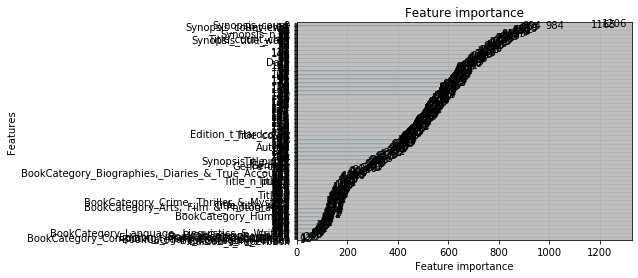

In [62]:
lgb.plot_importance(model)

In [63]:
test_lgb_1 = np.exp(test_lgb)-1
test_xgb_1 = np.exp(test_xgb)-1

In [286]:
answer1 = np.mean(test_xgb_1, axis = 1)

In [64]:
df = pd.concat([test_lgb_1, test_xgb_1], axis = 1)
answer1 = np.mean(df, axis = 1)

In [72]:
%%time
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=500, random_state=99)
rf.fit(train, train_label)
answer = rf.predict(test)

Wall time: 2min 43s


In [278]:
answer

array([485.72348, 986.83144, 499.44308, ..., 557.37162, 245.85934,
       890.7543 ])

In [624]:
sample.Price = np.exp(answer)-1

In [65]:
sample.Price = answer1.values

In [66]:
sample.to_excel('answer4.xlsx', index=False)

In [67]:
sample

,Price
0,400.922144
1,913.856581
2,314.173353
3,1006.681384
4,390.666378
...,...
1555,1315.822181
1556,175.505078
1557,592.375479
1558,250.811706


In [183]:
pd.Series(rf.feature_importances_, index = train.columns)

NameError: name 'rf' is not defined

In [313]:
x

,0,1,2
0,5.777148,0.0,0.000000
1,0.000000,0.0,5.910837
2,5.912602,0.0,0.000000
3,5.640060,0.0,0.000000
4,5.920628,0.0,0.000000
...,...,...,...
6224,6.722651,0.0,0.000000
6225,0.000000,0.0,5.849282
6226,6.410926,0.0,0.000000
6227,5.705458,0.0,0.000000


In [630]:
(ntrain_xgb[0]

0       0.000000
1       0.000000
2       0.000000
3       5.405558
4       6.950172
          ...   
6224    6.043969
6225    0.000000
6226    5.796917
6227    0.000000
6228    0.000000
Name: 0, Length: 6229, dtype: float64

In [295]:
train_lgb

,0,1,2
0,0.000000,0.000000,5.386080
1,0.000000,0.000000,5.712294
2,0.000000,0.000000,5.803772
3,0.000000,5.364648,0.000000
4,7.100501,0.000000,0.000000
...,...,...,...
6198,0.000000,6.297189,0.000000
6199,0.000000,0.000000,5.829923
6200,0.000000,5.687904,0.000000
6201,0.000000,0.000000,5.743549
